In [82]:
%load_ext autoreload
%autoreload 2
import networkx as nx
from skimage import morphology
import numpy as np
import scipy
import json, math, sknw, copy, random
from datetime import datetime
from matplotlib.cm import get_cmap
from matplotlib import pyplot as plt
from phil_transformations import image_preparation, createGML, metrics, graph2json, gtruth_map, exact_match
from phil_viz import graphPlusBg, drawResults, drawDefineRes, draw_graph, edge2draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
from experimentData import experiment_names, gtruth_Slice6_Spinning_Mixed

## 0. Ground Truth data

In [3]:
defineAngles = [60,30]
names_define, names_phil = experiment_names()

In [209]:
g_truth, results, resultsDefine, seeds, p_value_proposed_phils = gtruth_Slice6_Spinning_Mixed()

Slice6_Spinning_Marchantia_Mixed_JD_PL
2.8050212700899677 0.24597862549782842
t-test stats, p: 15.999999999999996 6.432625699223712e-08


/usr/lib64/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# 1. Pre-Processing of input
1. Data/Image Input
2. Skeletonization
3. Graph from skeleton
4. Graph to GML and JSON

## 1.1 Data Input
* Some additional parameter for neurons can be adjusted
* Set image as B&W, with black background, as needed before skeletonization

In [210]:
#path = "Synth-DefineFig1/define-weighted-4_inv.png"
#path = "Synth-DefineFig1-2/define-weighted-4_inv.png"
#path = "Synth-QuantitativeIFS-Fig7/Synth-QuantitativeIFS-Fig7.png"
#path = "Synth-QuantitativeIFS-Fig7-2/Synth-QuantitativeIFS-Fig7.png"
#path = "SpinningMarchantiaGraph/50_ROIs_Spinning_Marchantia_inv.png"
#path = "field3_t0_2cellBcrop_filtered_1_crops/field3_t0_2cellBcrop_filtered_crop_z_filled.png"
#path = "field3_t0_2cellBcrop_filtered_2_crops/field3_t0_2cellBcrop_filtered_2_crop_z_filled.png"
#path = "neuronas/Porta6-4a1/grupo3-Porta6.4a1_MAX_cleaned.png"
#path = "neuronas/Porta10-5b/grupo1-Porta10.5b-AVG_partialCleaned.png"
#path = "neuronas/Porta18-3a1/grupo2-Porta18.3-a1_AVG_cleaned.png"
#path = "../../neurons/OlfactoryProjectionFibers/OP1_Max.png"
#path = "../NewTests/Slice6-Spinning-PL/Slice6-Spinning-PL-gtruth-preSkel-BW-littleClean.png"
path = "../NewTests/Slice6-Spinning-JD-PL/slice6-spinning-merged-gtruths-segmented.png"
#path = "../NewTests/field4_t0/field4-t0-gtruth-segmented.png"
#path = "../NewTests/field4_t2/field4-t2-segmented.png"
#num = 0
#path = f"../generador_skeletons/arboles/arbol{num}/arbol{num}_max.png"
#path = f"../generador_skeletons/red/red{num}/red{num}.png"
manualThresh = False
name = path.split("/")[-1]
name = name.replace(".png","")
folder = path.rsplit("/",1)[0]
print(name, folder)

slice6-spinning-merged-gtruths-segmented ../NewTests/Slice6-Spinning-JD-PL


255 0
0.0 1.0 (356, 359)


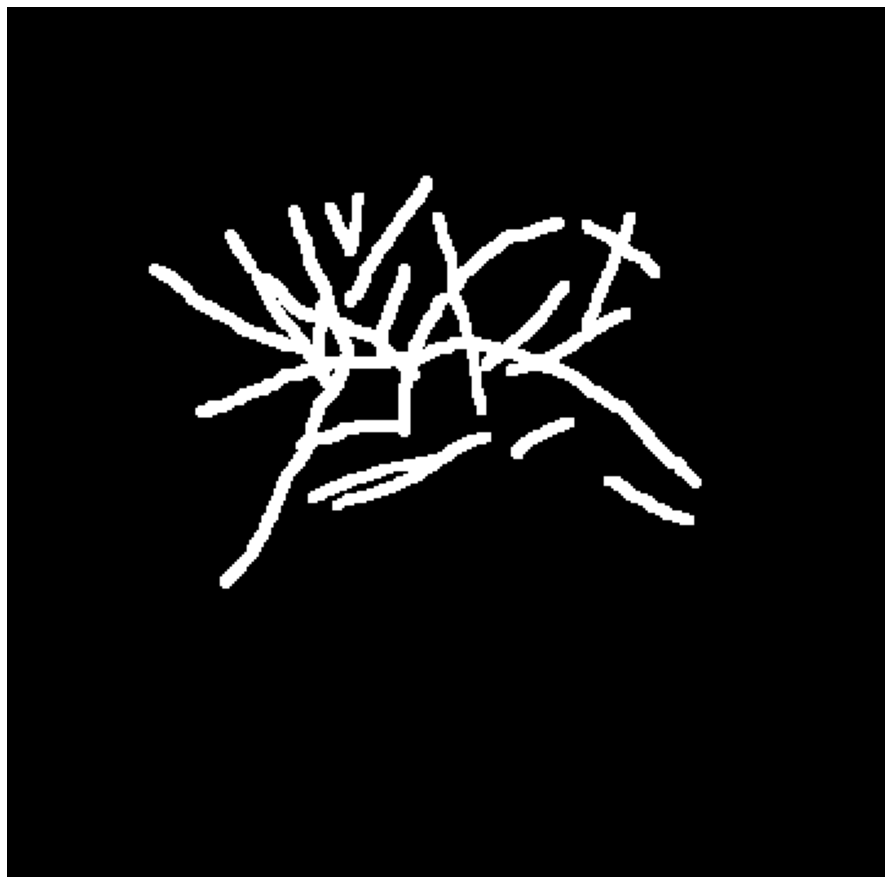

In [211]:
outSkel, initialImage = image_preparation(path, bg_to_black=True)

## 1.2 Skeletonize Image

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]


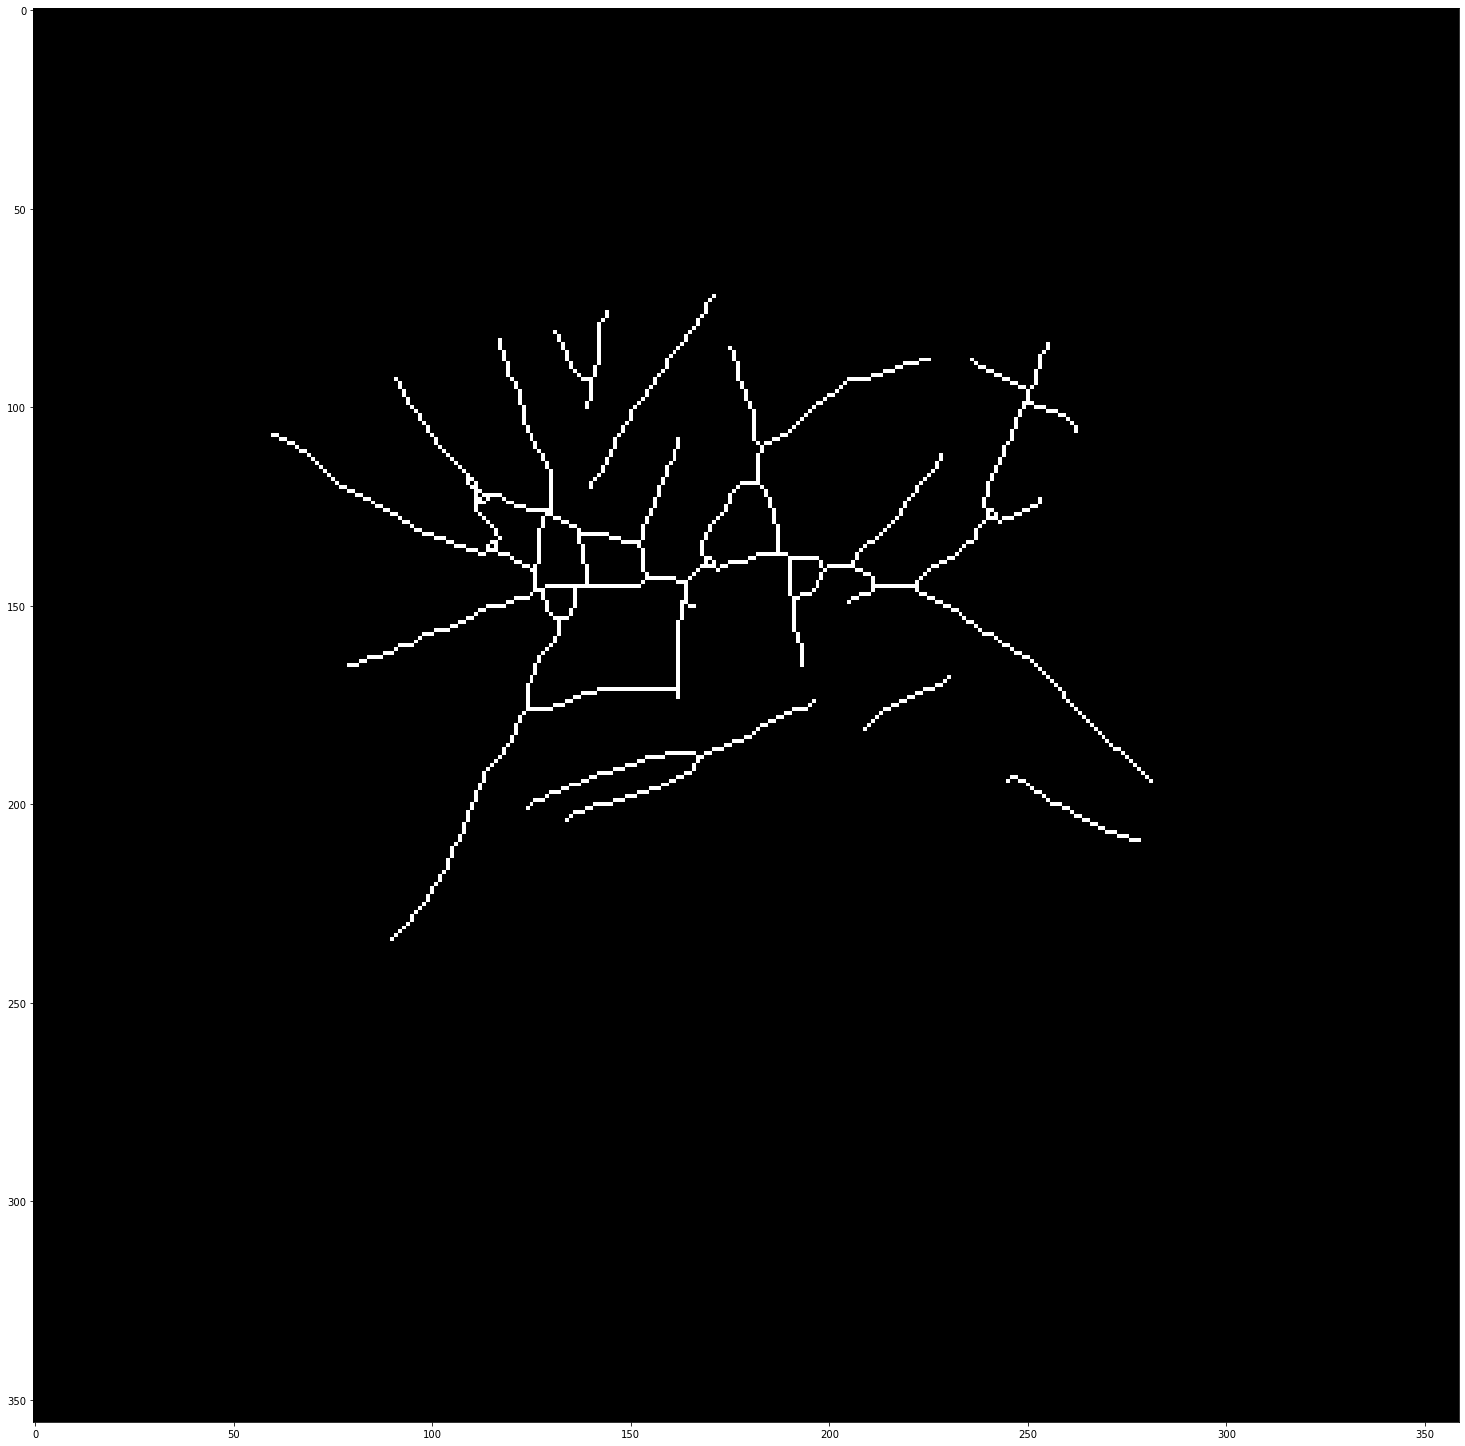

In [212]:
plt.figure(figsize=(28, 26))
outSkel1 = morphology.skeletonize(outSkel).astype(np.uint16)
plt.imshow(outSkel1, plt.cm.gray)
graph = sknw.build_sknw(outSkel1)
print(graph.nodes())

## 1.3 Create Graph
* Clean and paint graph
* To get only nodes and edges, set 
```
 name=name+"-thick", folder=folder, edge_text_color="white",
 node_text_color="white", end_node_color="white",
 node_size=15, edge_size=20, edge_marker="."
```

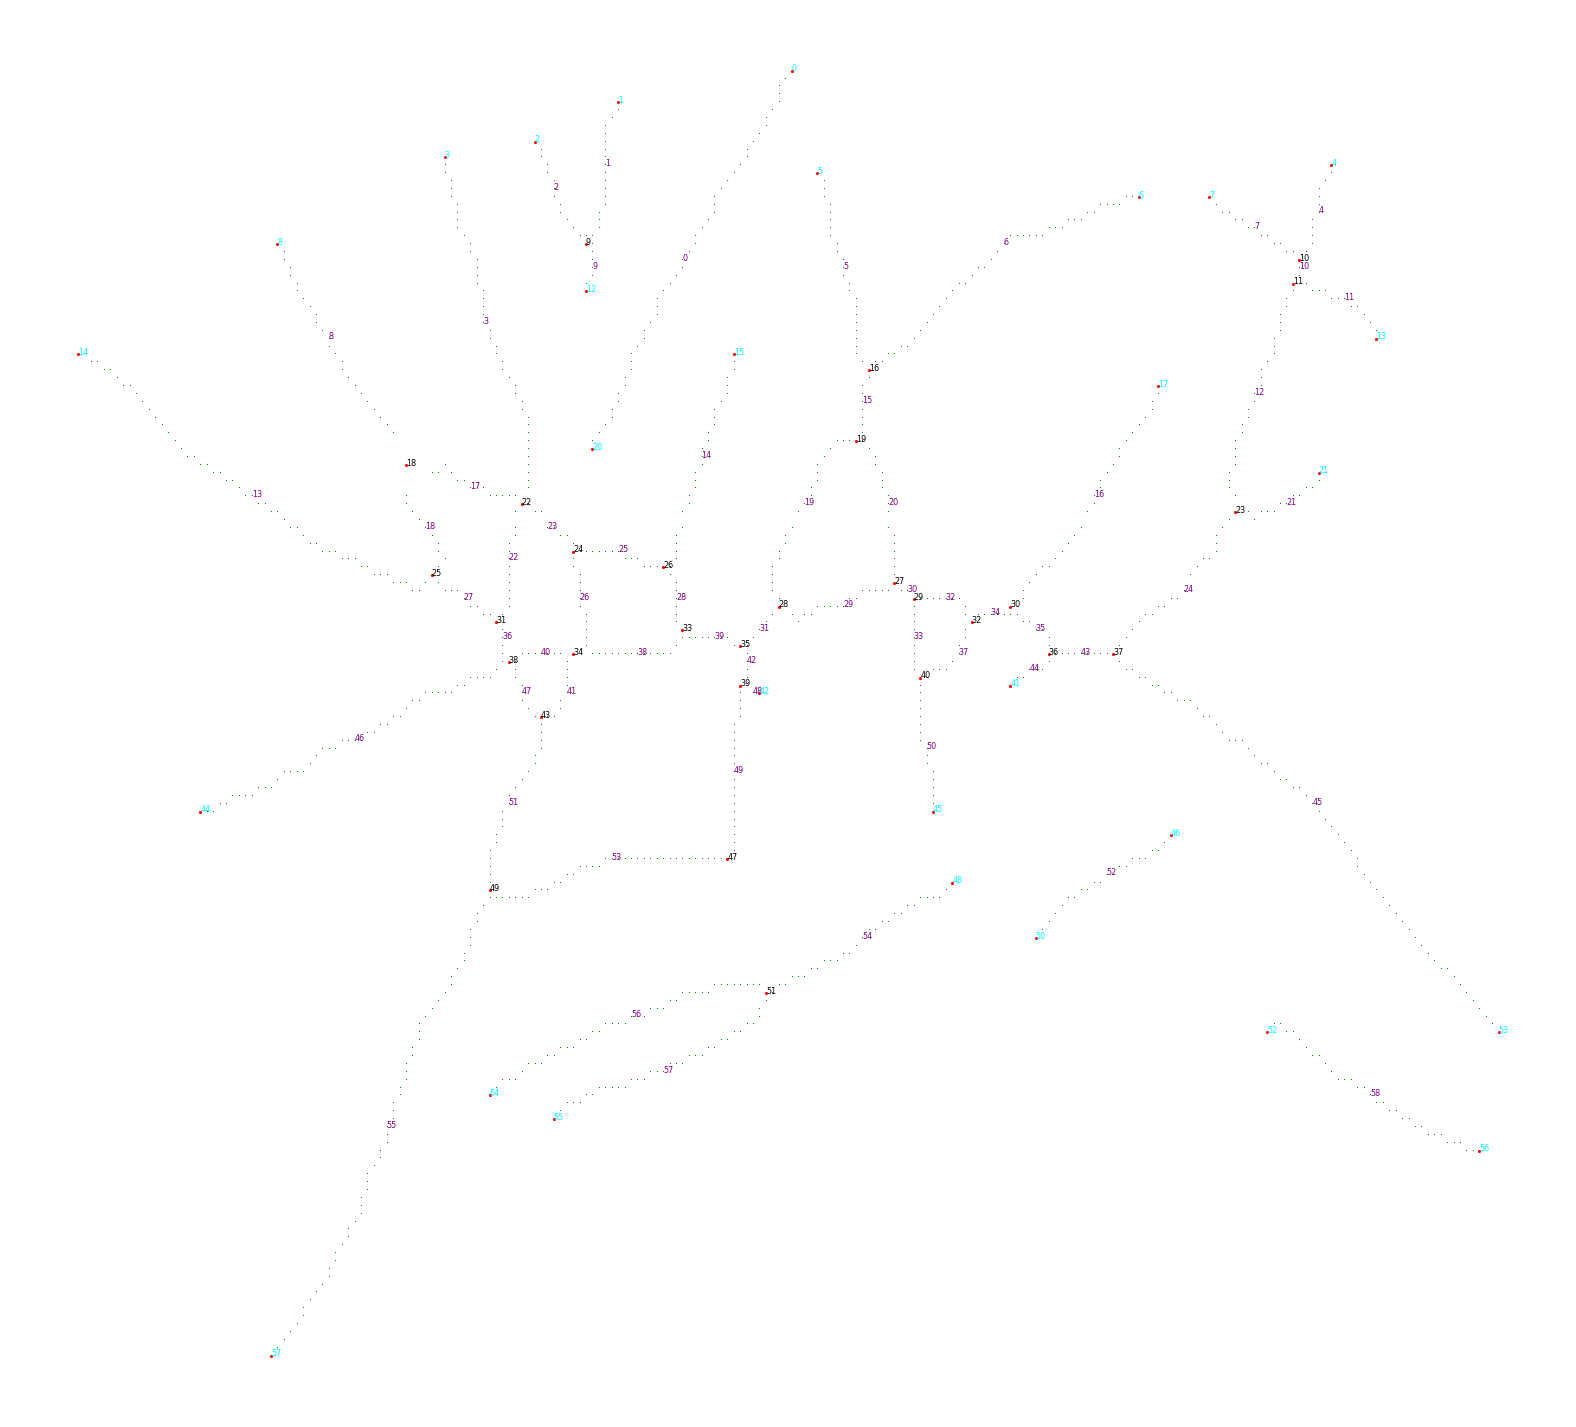

In [213]:
nodes2edge, nodesByPos = draw_graph(graph, save_fig=False, name=name, folder=folder)

## 1.4 Create GML and JSON
1. Create GML (Optional, used as inpyt by DeFiNe)
2. Create JSON

### 1.4.1 Create GML

In [ ]:
createGML(name, folder, graph, save=False)

### 1.4.2 Create JSON
* Extract data from graph using known graph functions
* Draw graph with edge info

In [ ]:
graph2json(graph, save_json=False, name=name, folder=folder)

In [ ]:
#graphPlusBg(graph, initialImage, centerNodes, saveimg=False, fontsze=34, mrkrsze=20, linesize=14)
graphPlusBg(graph, initialImage, centerNodes, saveimg=False, fontsze=34, mrkrsze=20, linesize=14,
            name=name, folder=folder)

# 2. Results
* Draw ground Truth and results in graph for each seed tested with the phil/ACO algorithm

In [214]:
# Re-order the ground truth into two dictionaries
gtruth_dict, gtruth_rev = gtruth_map(g_truth)
# Get the ant/filaments that where matched by the algorithm, for each set of proposed filaments in results
exact_phils = exact_match(gtruth_rev, results, names=names_phil)

Exact match propFils_phil_skel_s10: 11
Exact match propFils_phil_skel_s0: 11
Exact match propFils_phil_skel_s1271: 11
Exact match propFils_phil_skel_s3389: 10
Exact match propFils_phil_skel_s6821: 11
Exact match propFils_phil_s221: 11
Exact match propFils_phil_s117: 11
Exact match propFils_phil_s29: 12
Exact match propFils_phil_s8192: 11
Exact match propFils_phil_s851: 10


2021-05-19 12:40:58.593770


'filaments: 23'

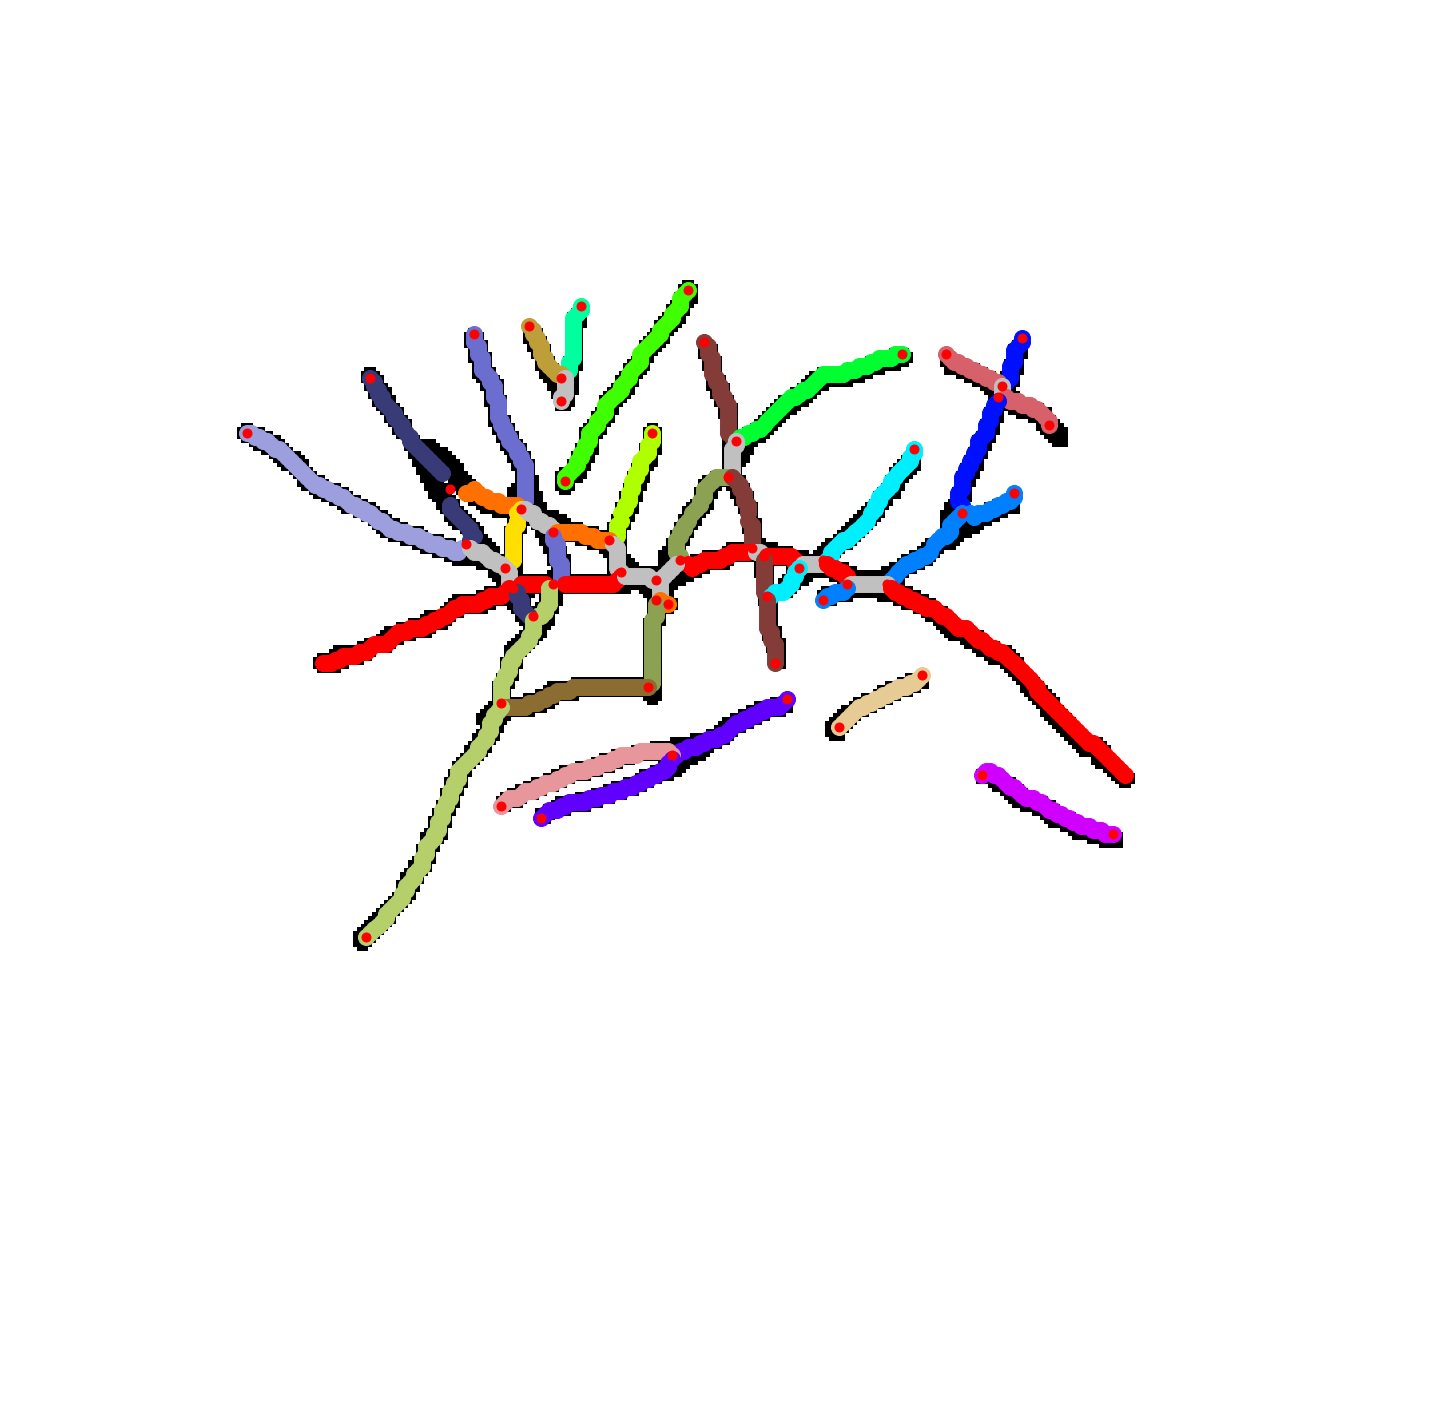

In [215]:
# Draw ground truth
edge2Ants, ant_colors = edge2draw(gtruth_dict)
drawResults(graph, "ground-truth", outSkel, nodes2edge, folder, name, edge2Ants,
            ant_colors, save_fig=True, extended=False, fntsz=8)
print(datetime.now())
f"filaments: {len(gtruth_dict.keys())}"

## 2.2 Draw results of proposed ants/filaments

10
0
1271
3389
6821
221
117
29
8192
851


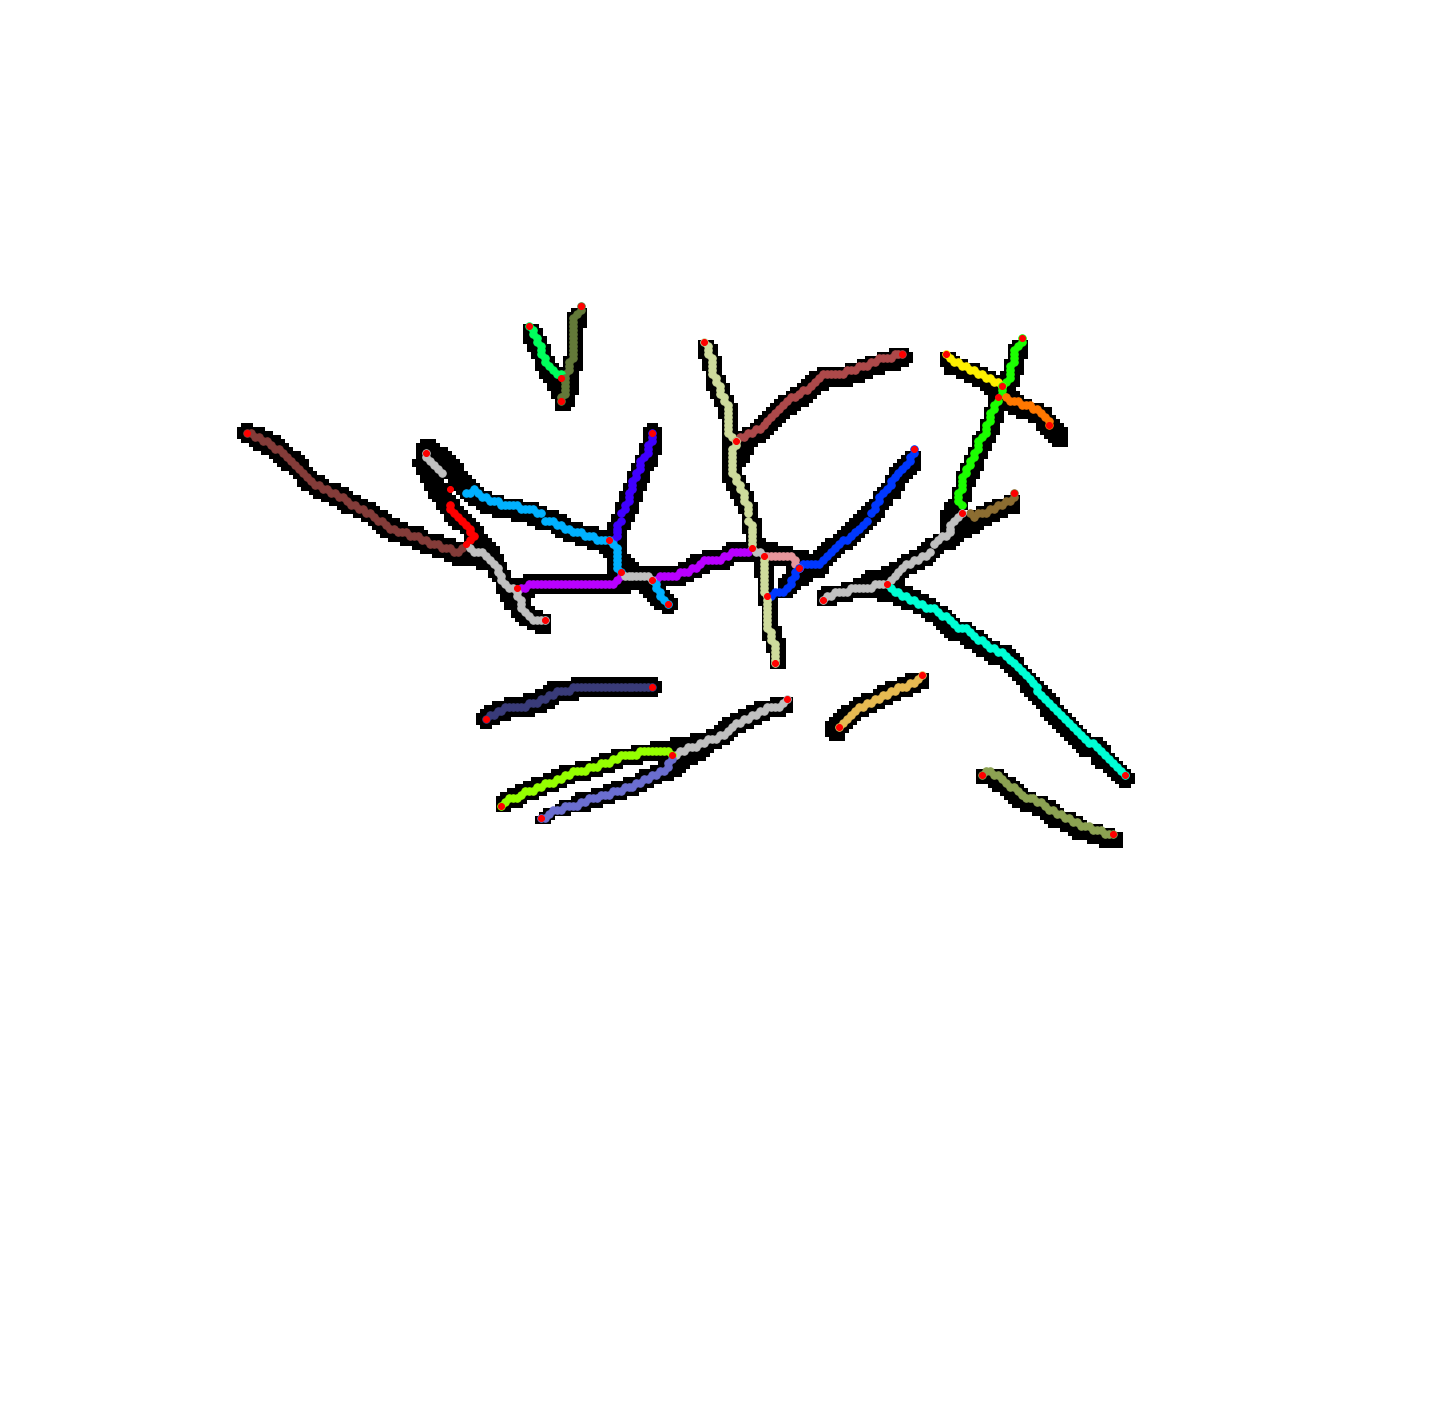

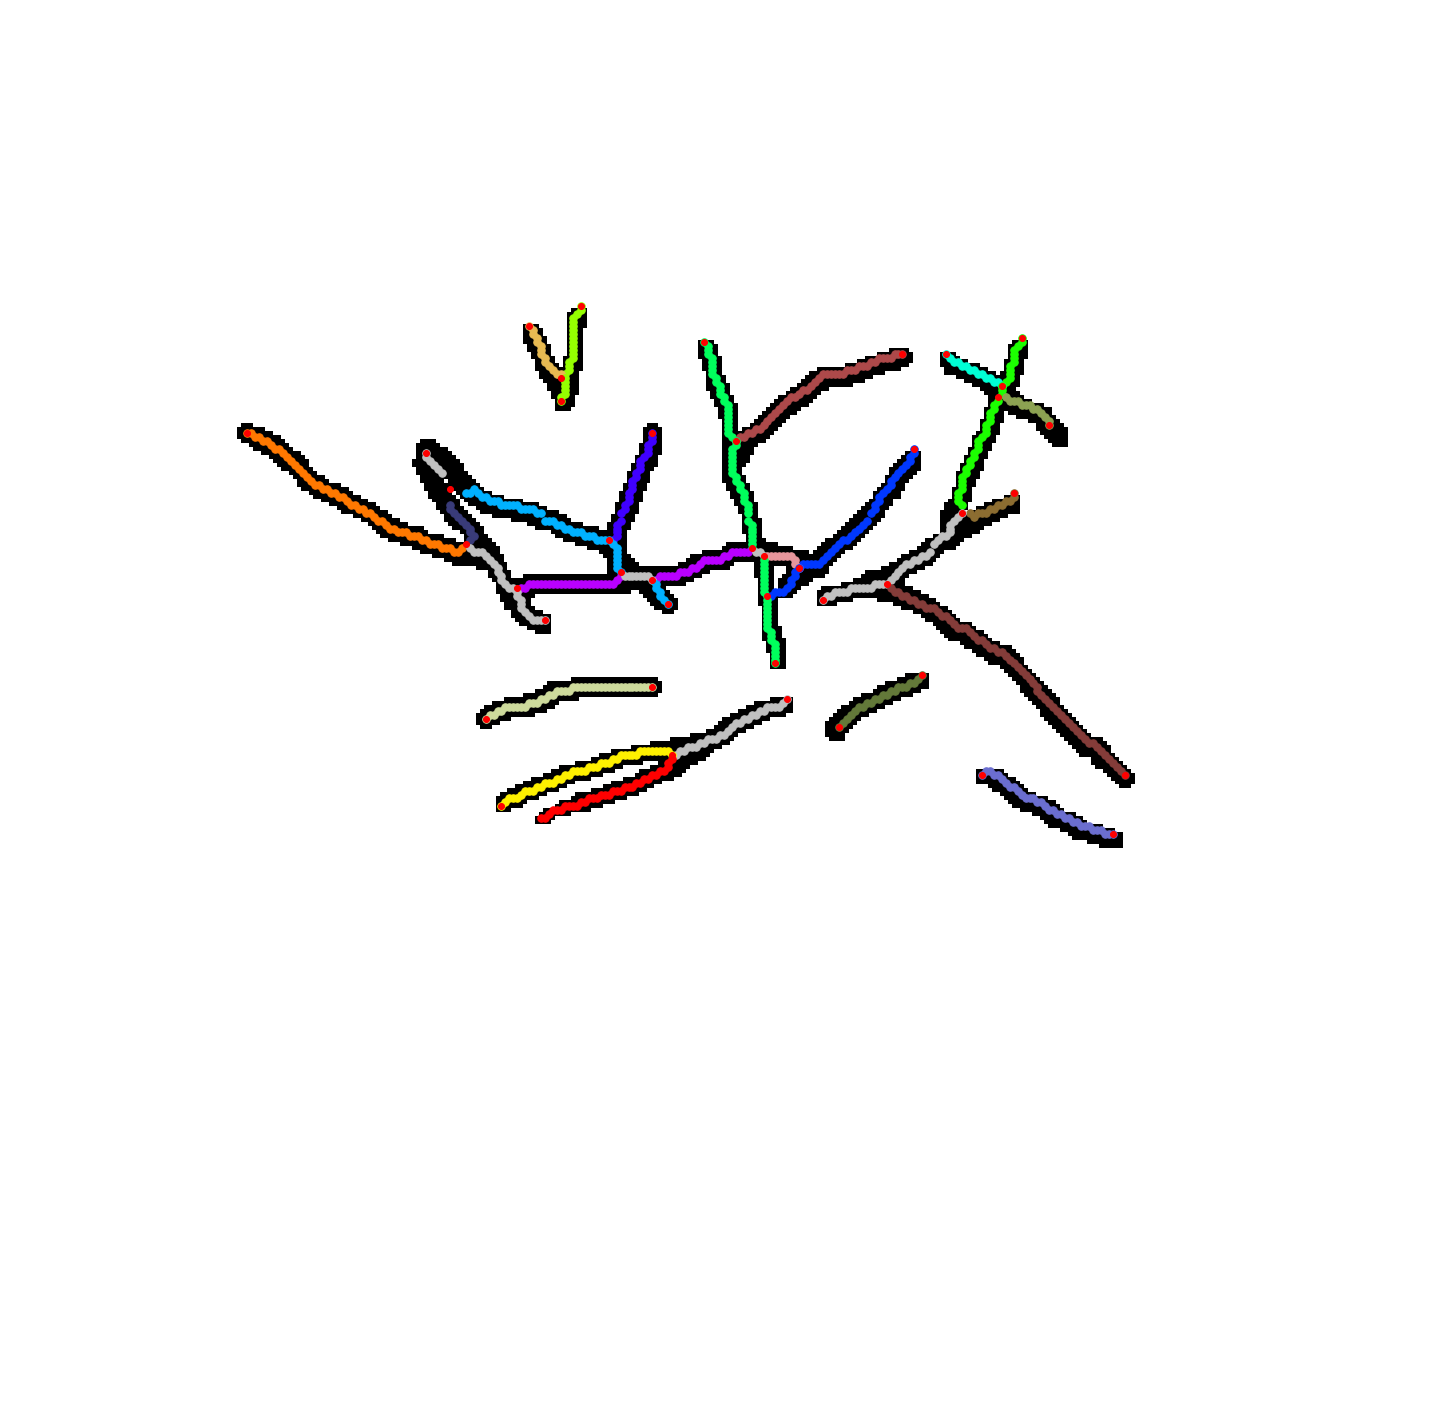

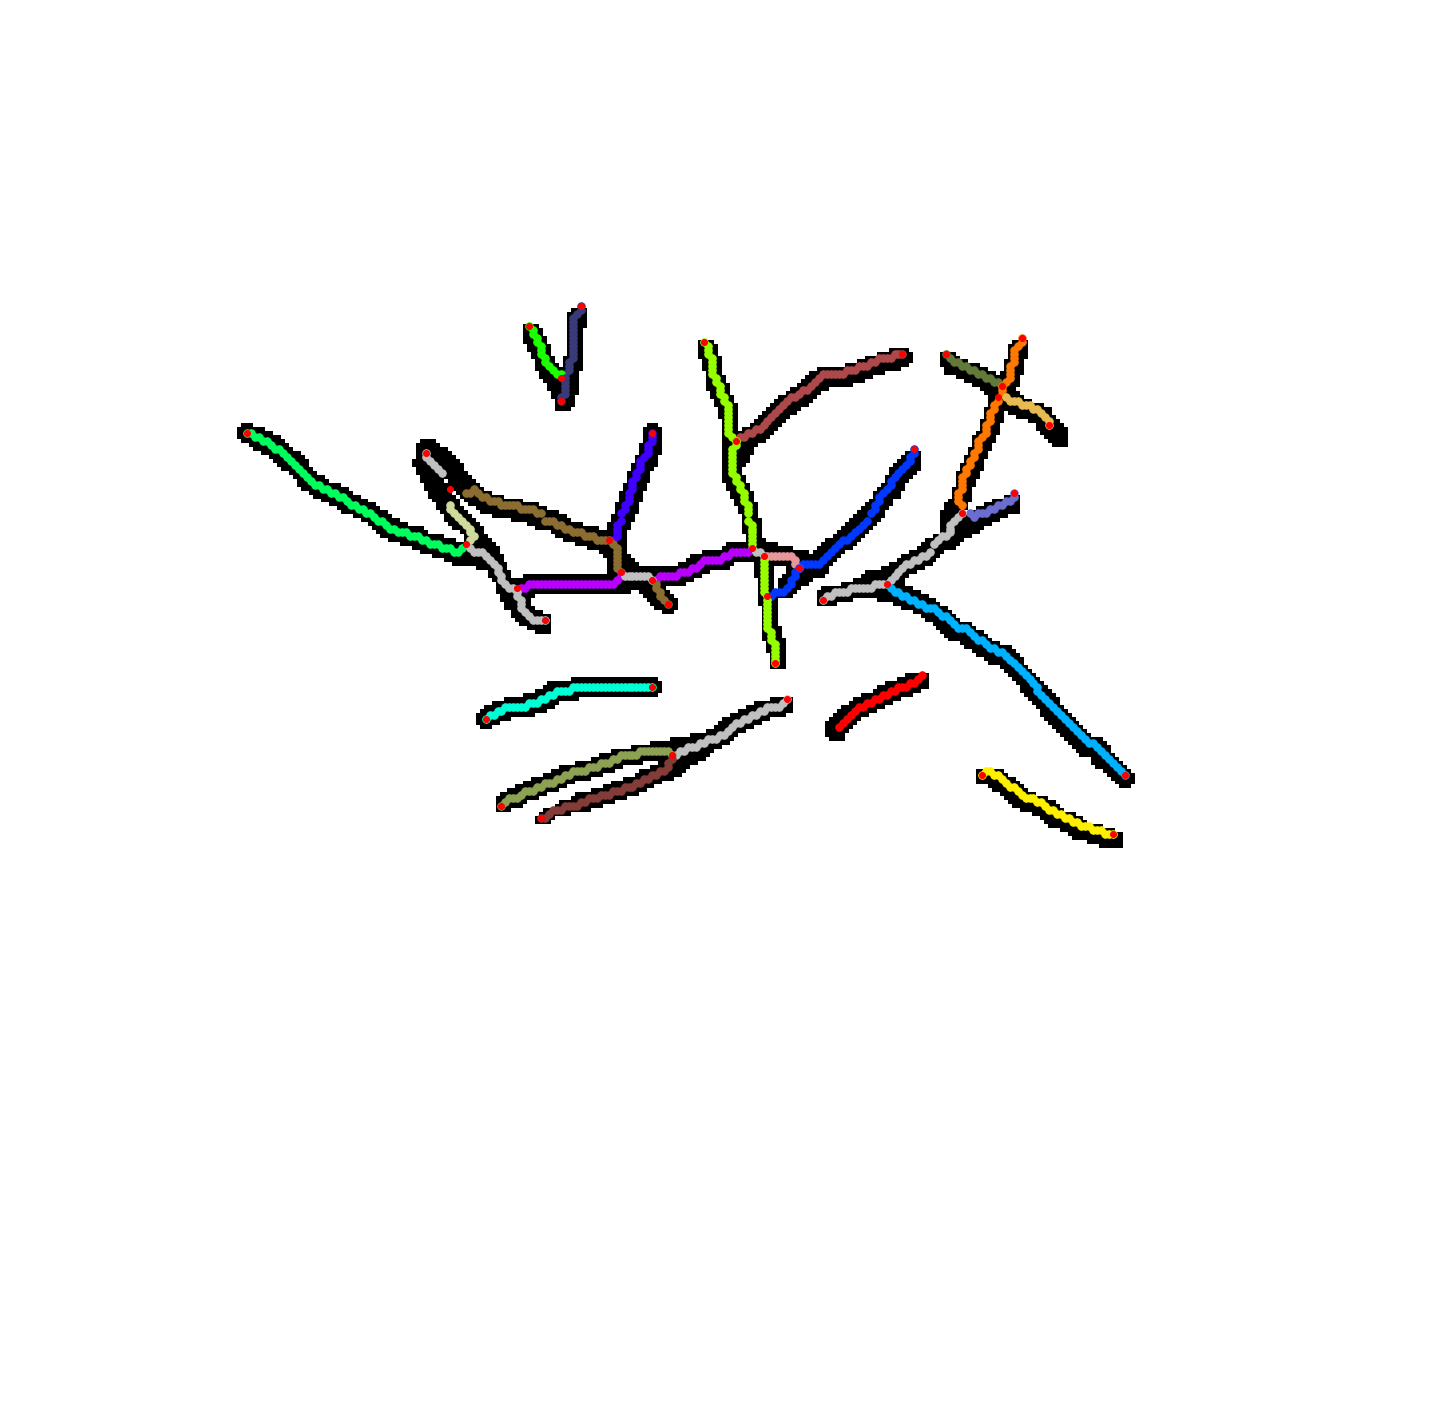

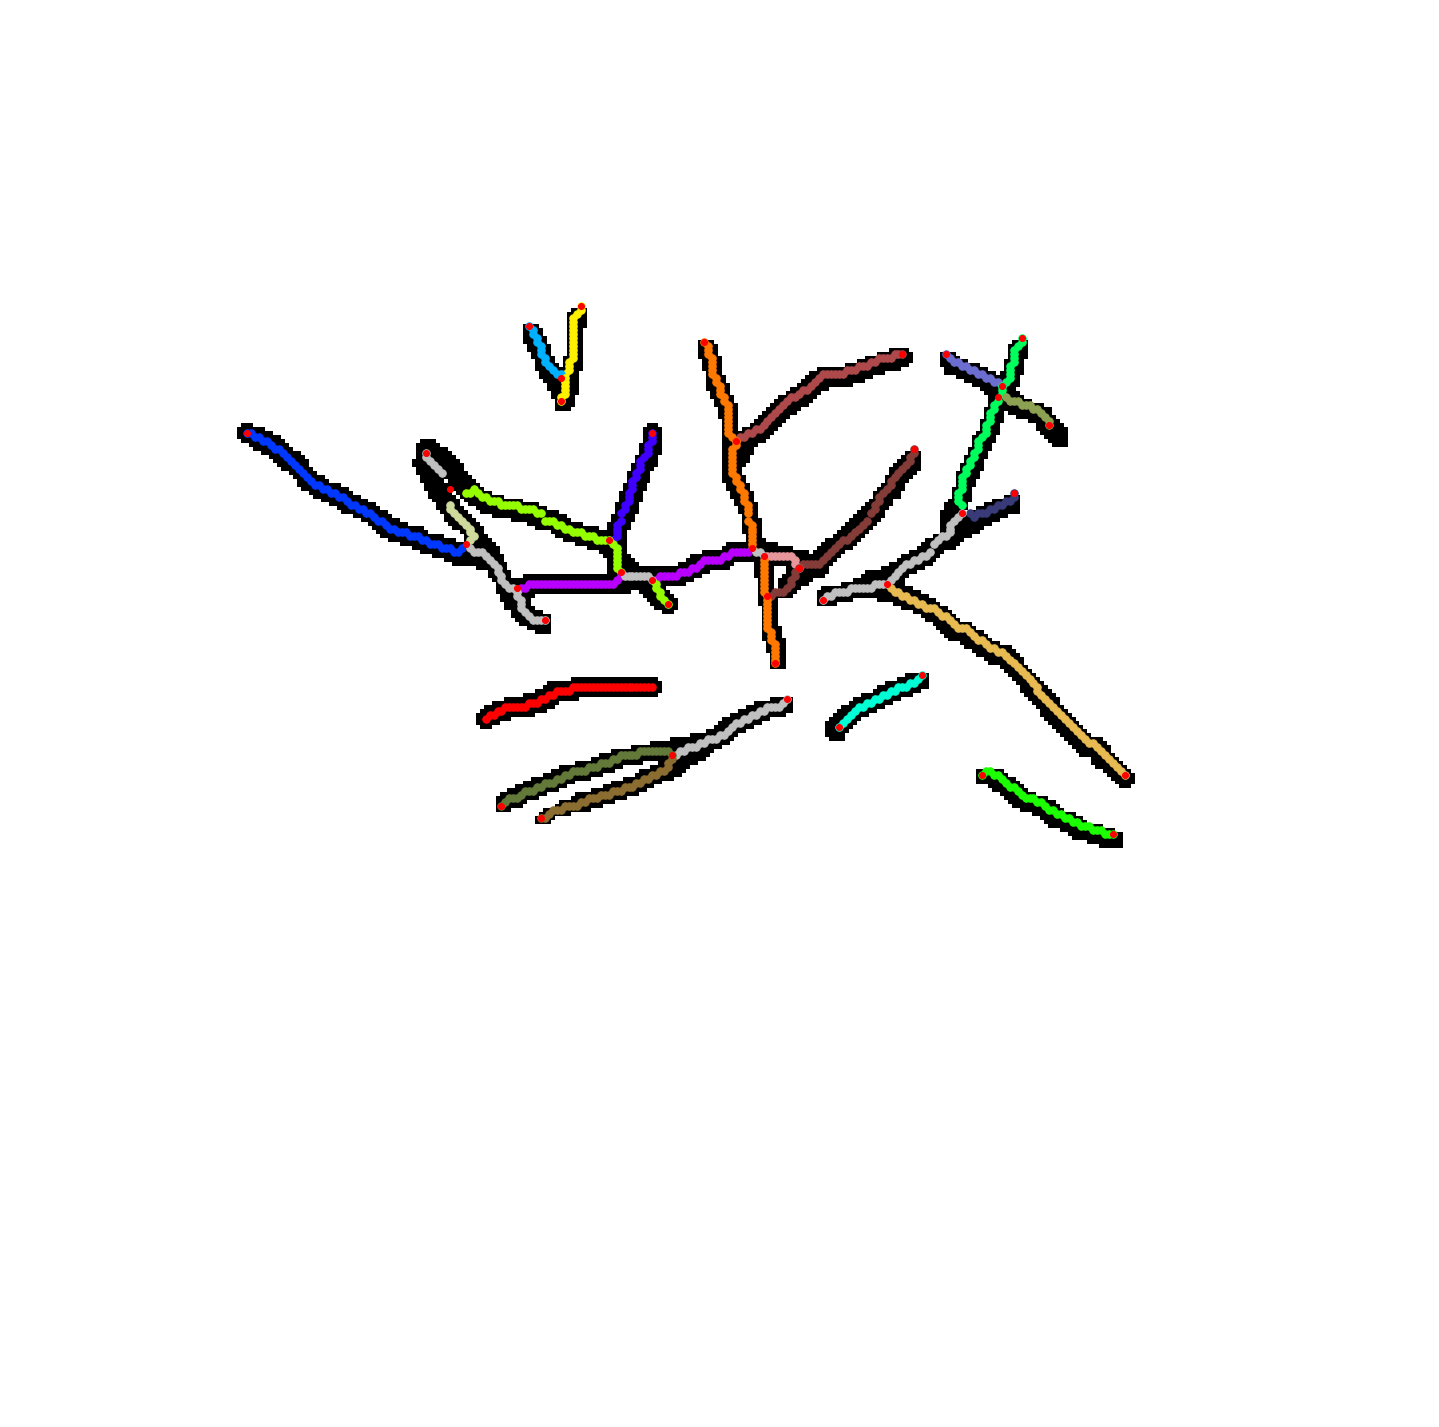

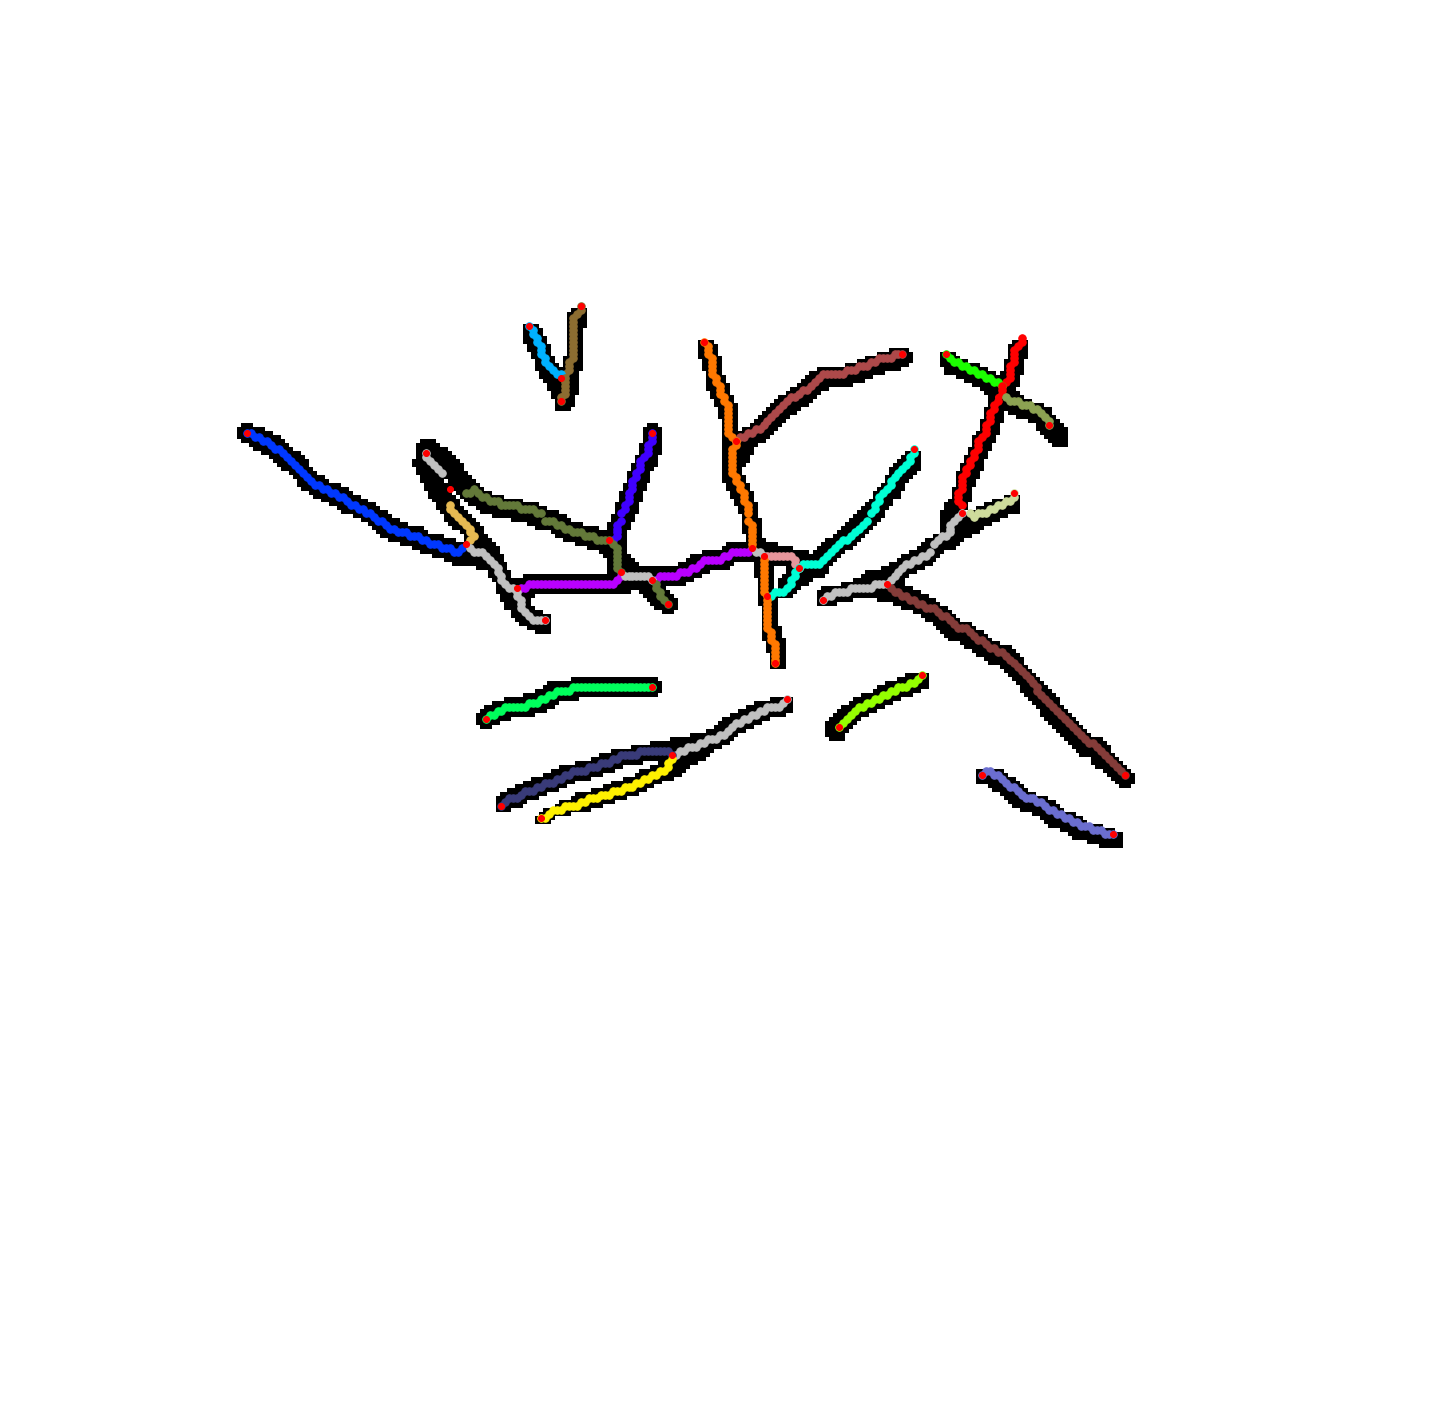

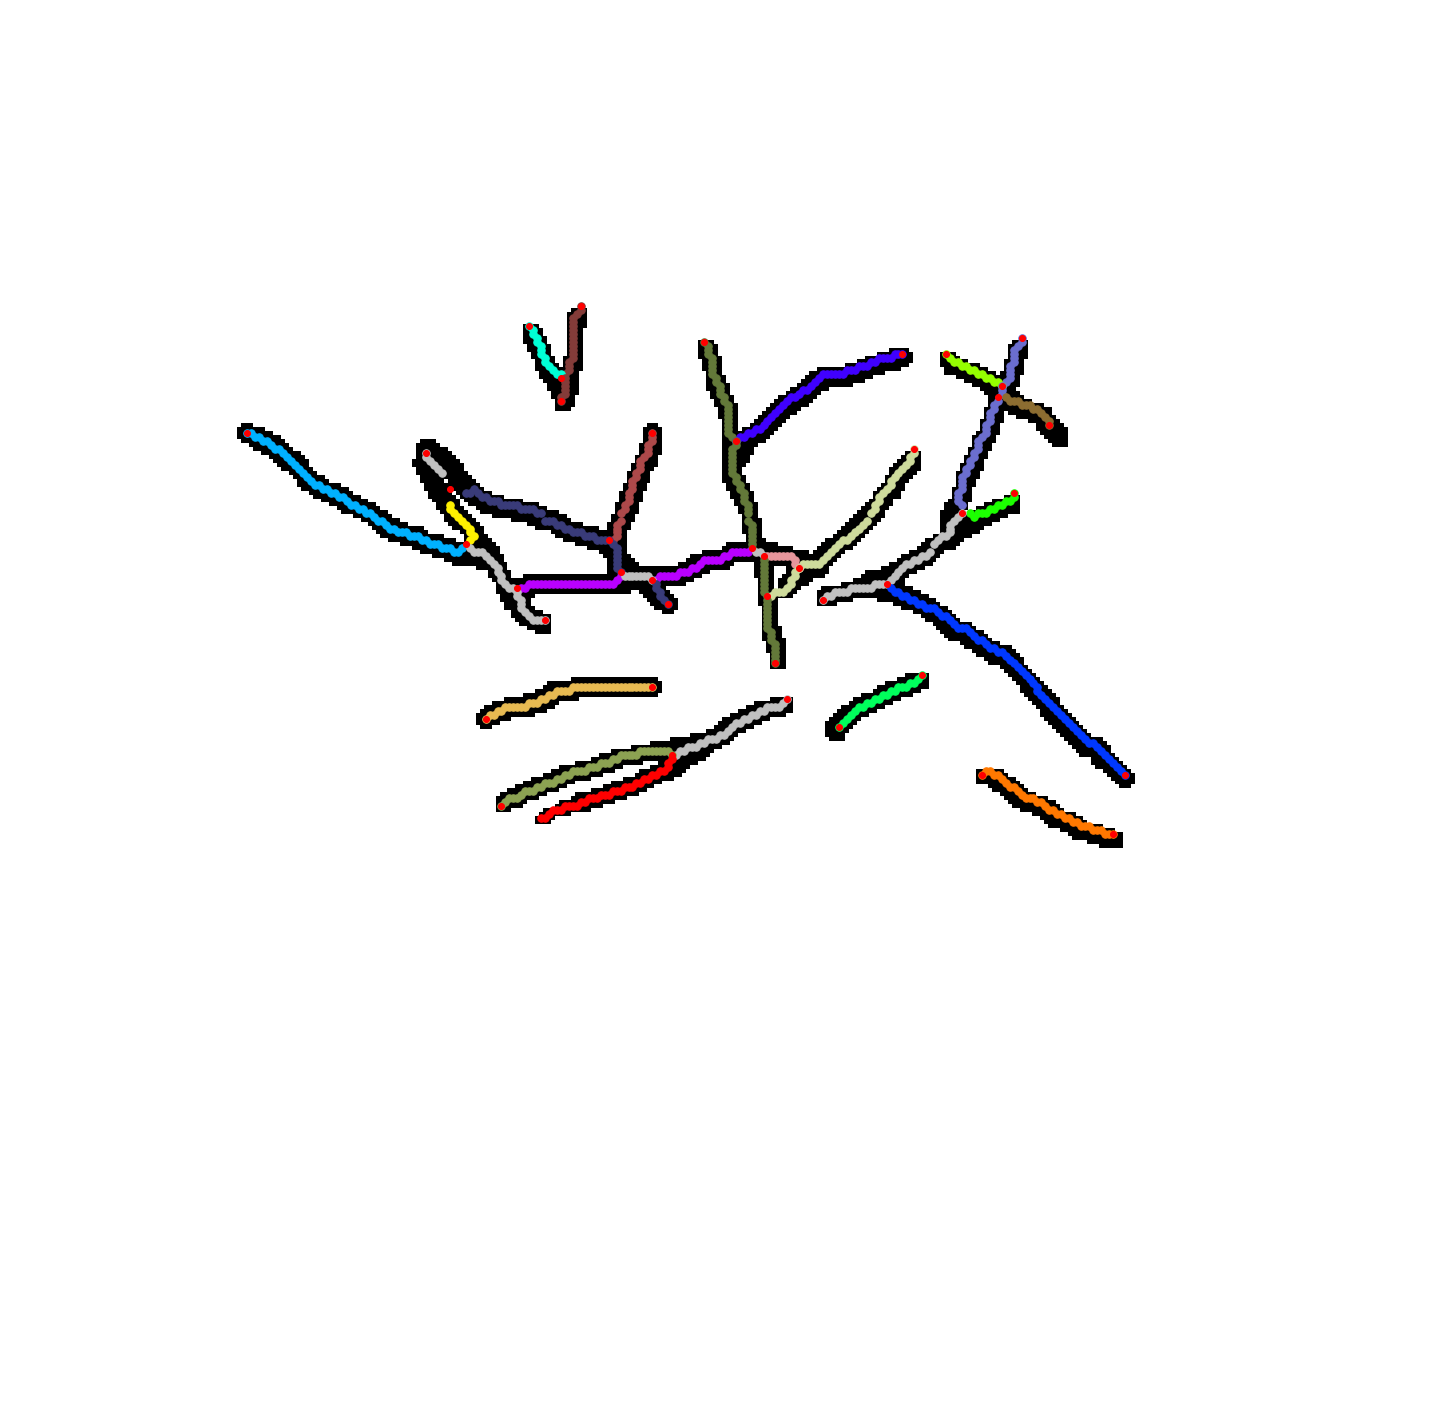

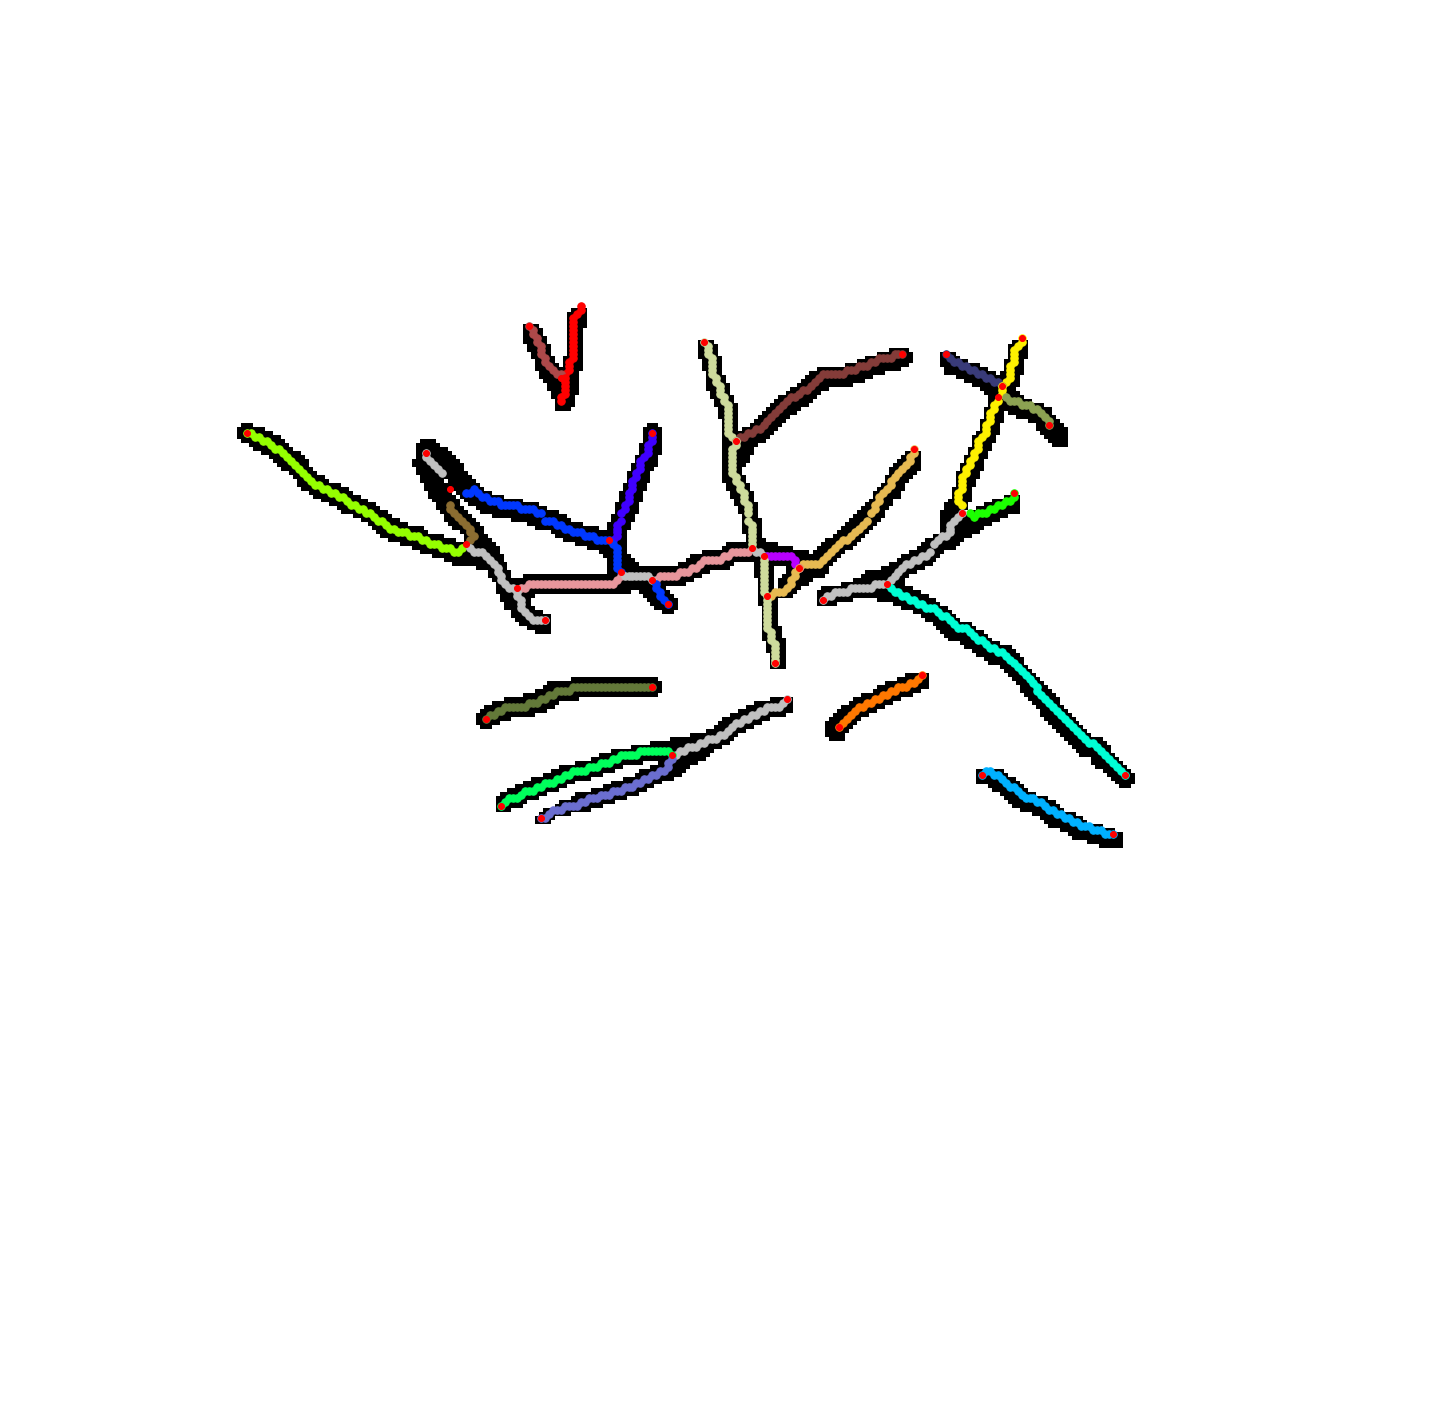

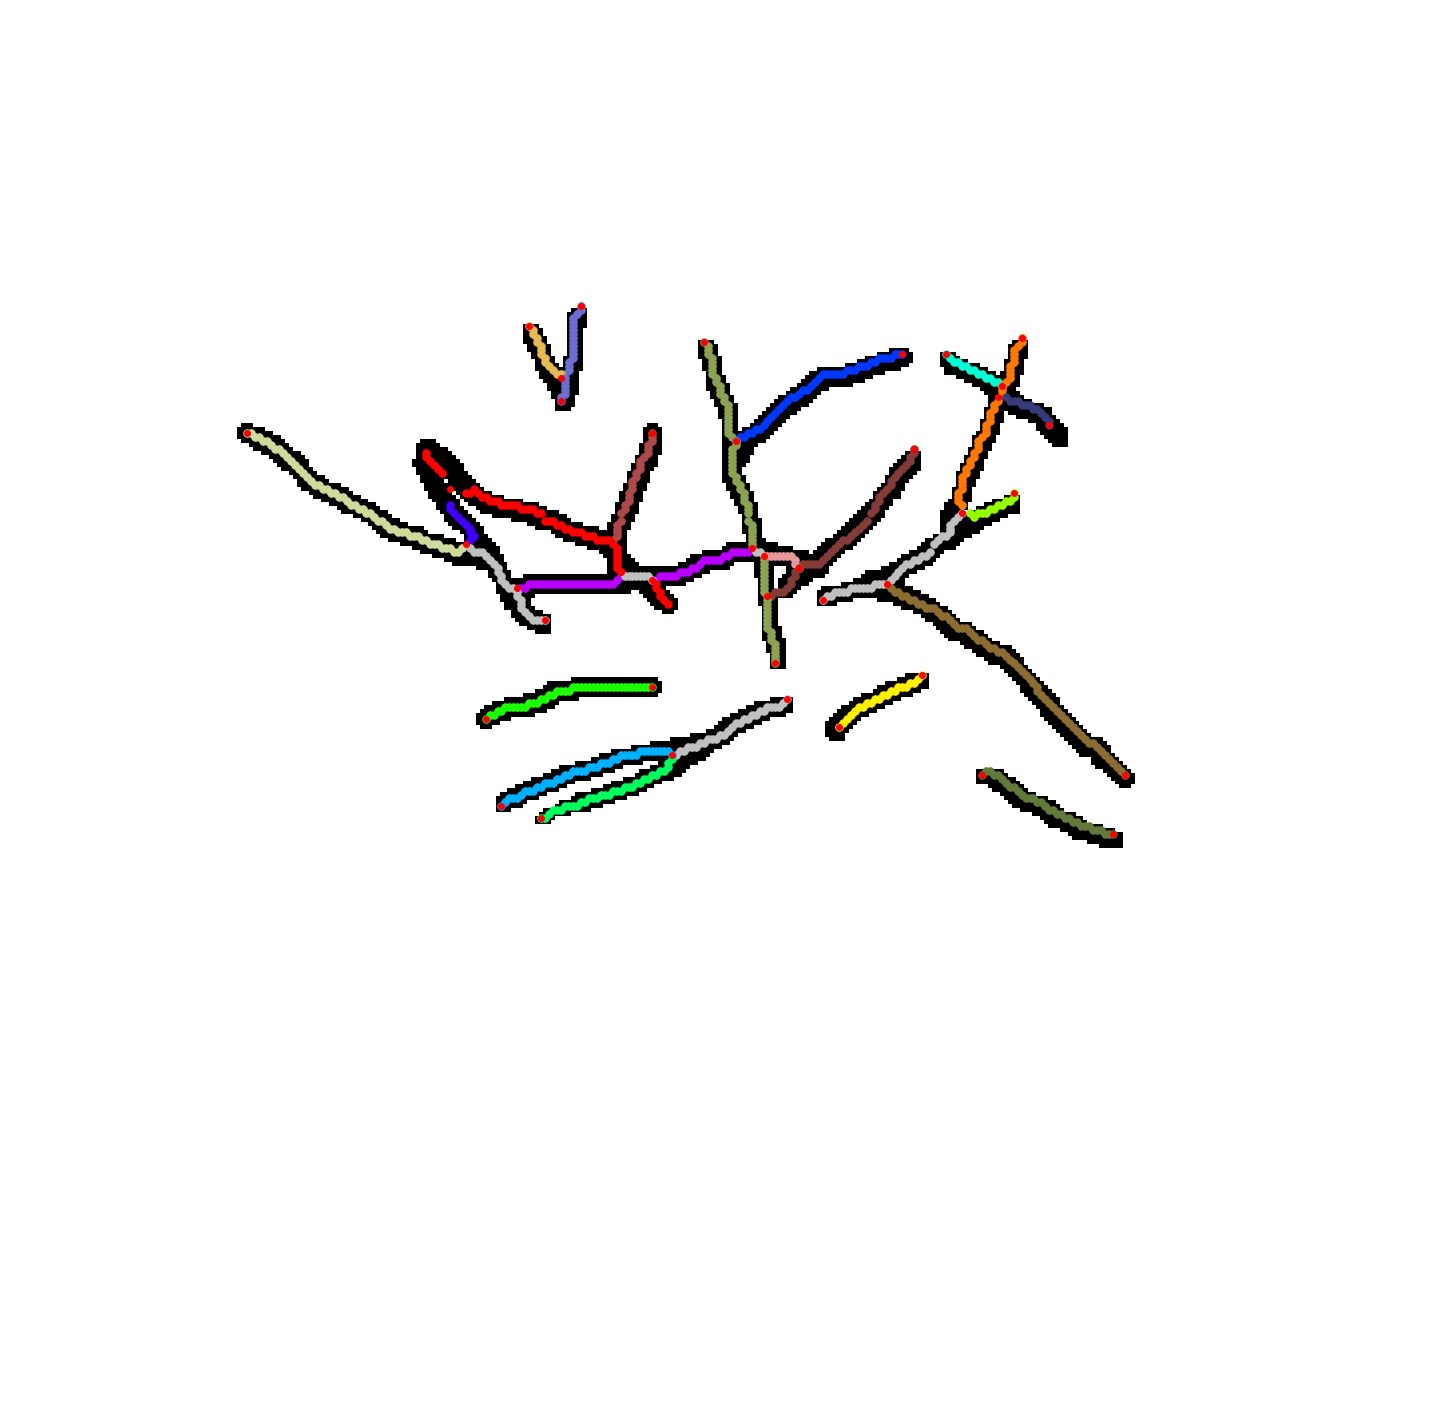

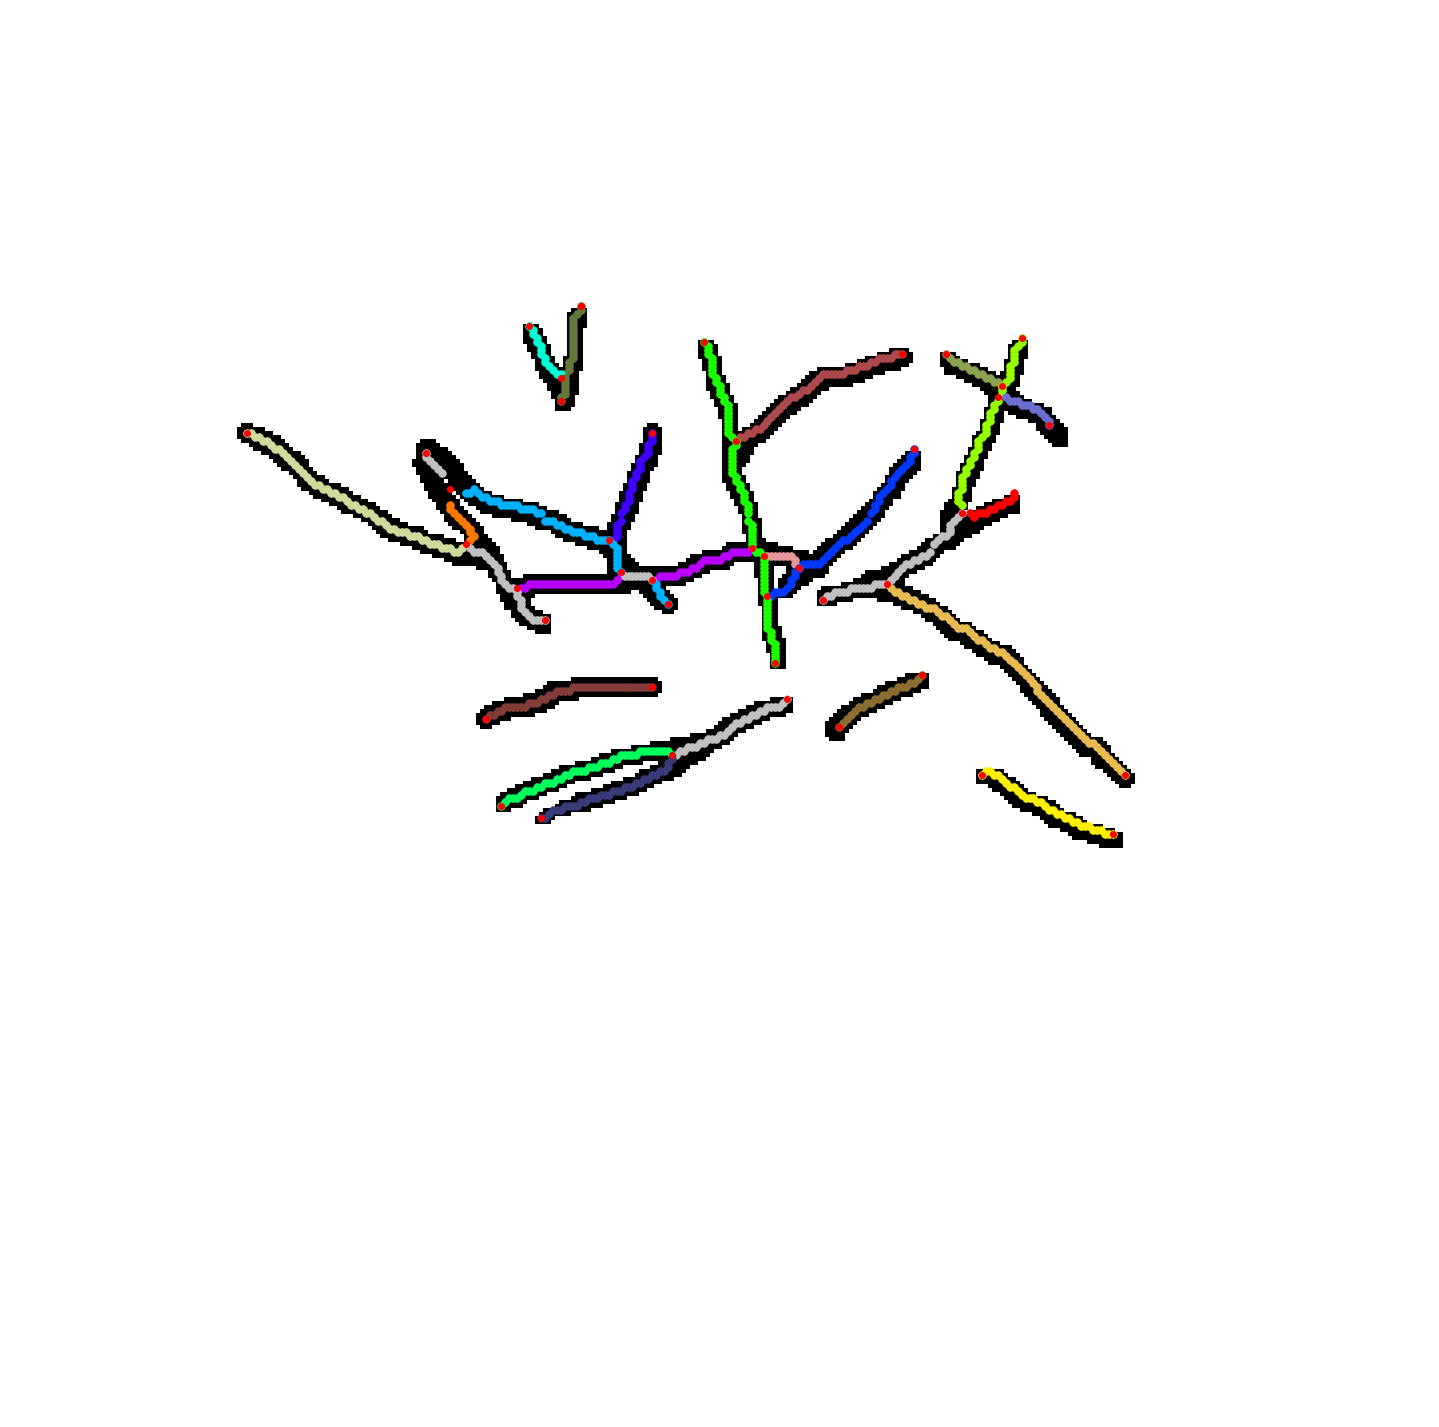

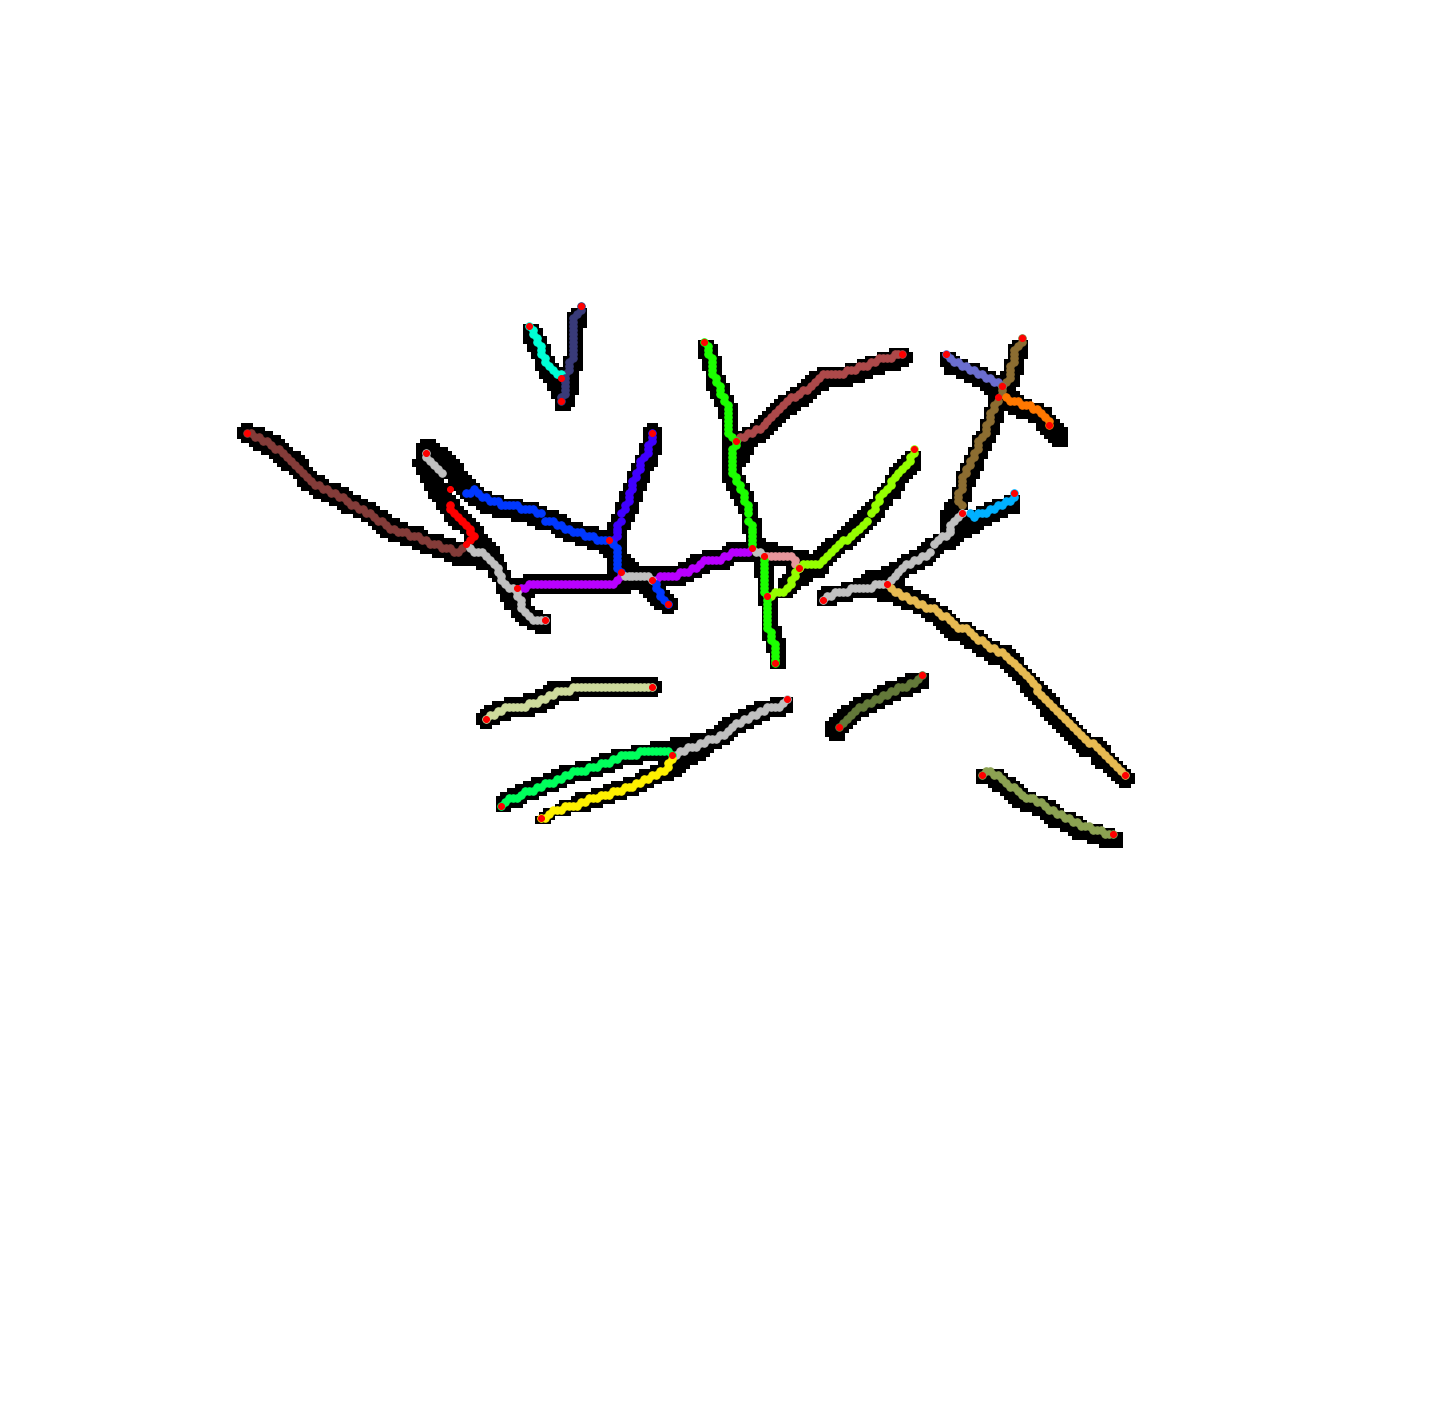

In [14]:
# Draw results
proposed_ant_colors = {}
for counter, res in enumerate(results):
    version=f"-phil-s{seeds[counter]}-v056-nobg-"
    print(seeds[counter])
    edge2Ants, ant_colors = edge2draw(res)
    proposed_ant_colors[counter] = ant_colors
    drawResults(graph, version, outSkel, nodes2edge, folder, name, edge2Ants, ant_colors, 
                save_fig=False, bg=True, extended=False, linesize=15, mrkrsz=6)

## 2.3 Draw exactly matched ants/filaments from proposed ones with respecto to the ground truth

Exact matches seed 10: 8 -> dict_keys([8, 10, 0, 7, 3, 11, 9, 4])
Exact matches seed 0: 8 -> dict_keys([0, 8, 9, 3, 7, 11, 10, 4])
Exact matches seed 1271: 8 -> dict_keys([10, 3, 0, 11, 9, 7, 8, 4])
Exact matches seed 3389: 8 -> dict_keys([3, 9, 8, 10, 0, 11, 4, 7])
Exact matches seed 6821: 7 -> dict_keys([3, 10, 0, 7, 9, 11, 4])
Exact matches seed 221: 8 -> dict_keys([0, 9, 10, 3, 8, 7, 11, 4])
Exact matches seed 117: 8 -> dict_keys([0, 10, 3, 8, 9, 7, 11, 4])
Exact matches seed 29: 8 -> dict_keys([8, 3, 0, 7, 10, 11, 9, 4])
Exact matches seed 8192: 8 -> dict_keys([3, 0, 8, 10, 9, 11, 7, 4])
Exact matches seed 851: 8 -> dict_keys([10, 0, 9, 3, 8, 11, 7, 4])


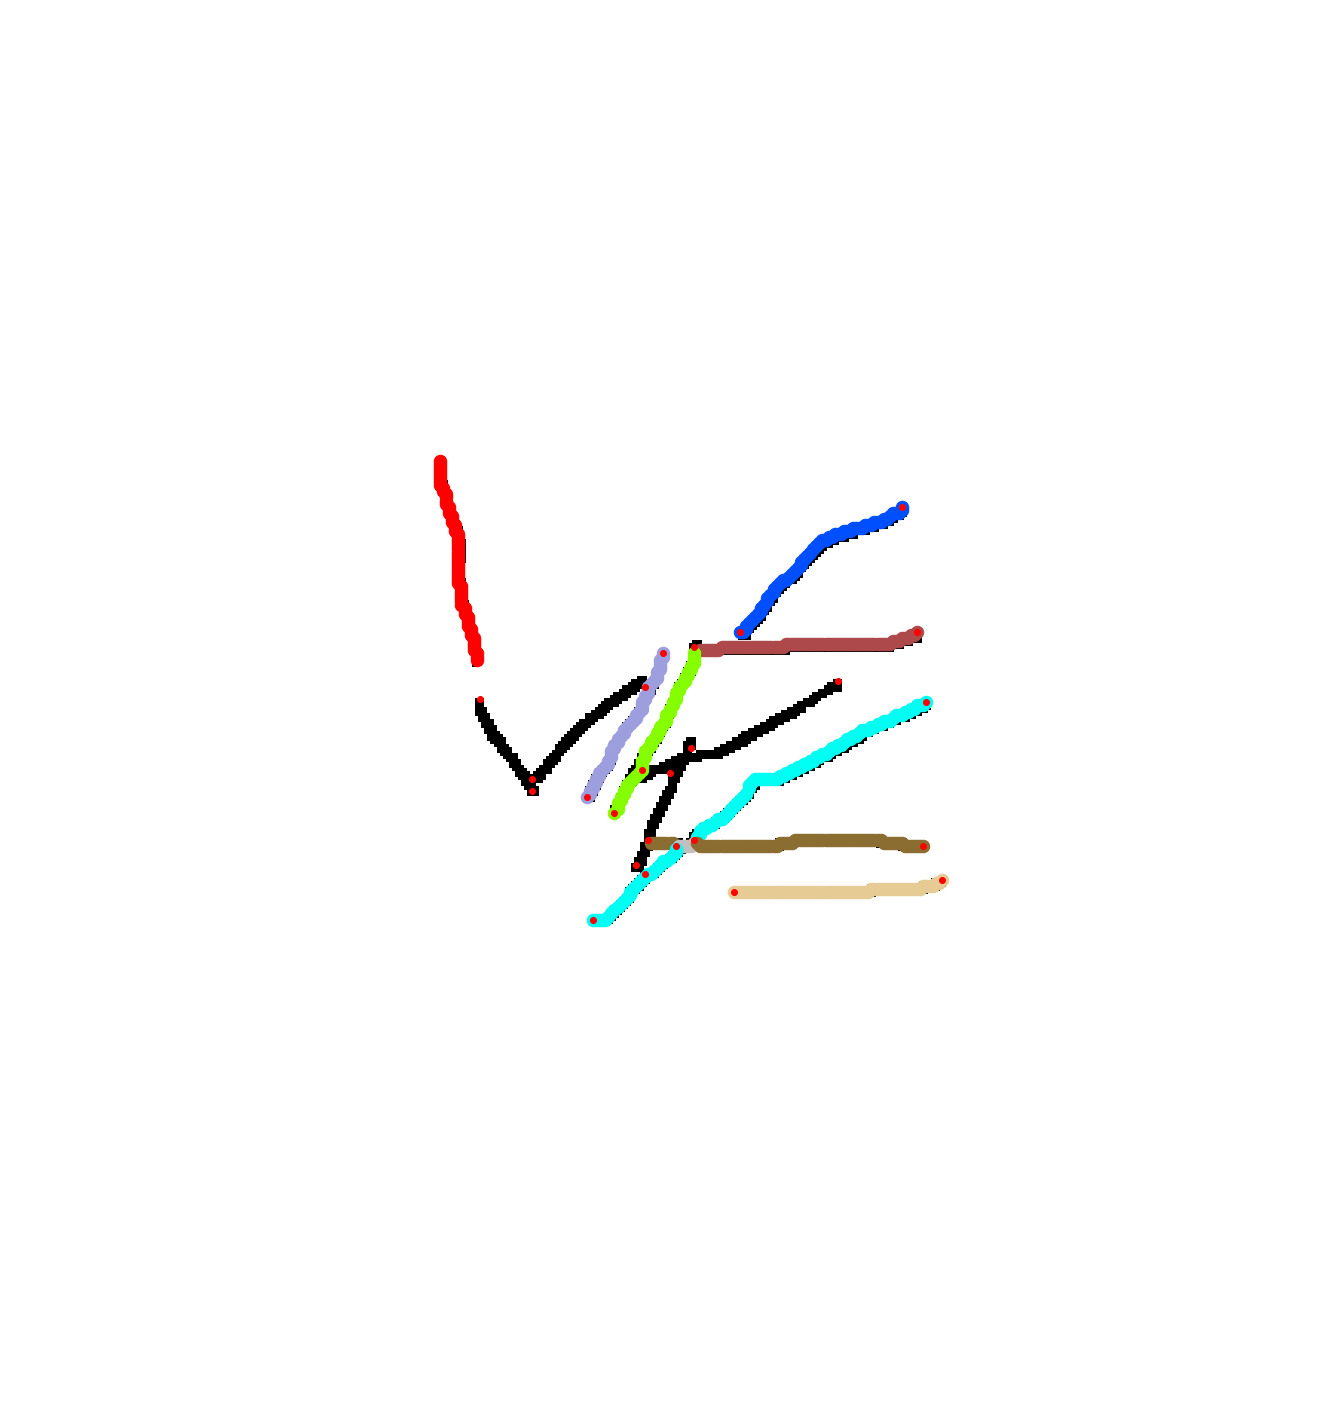

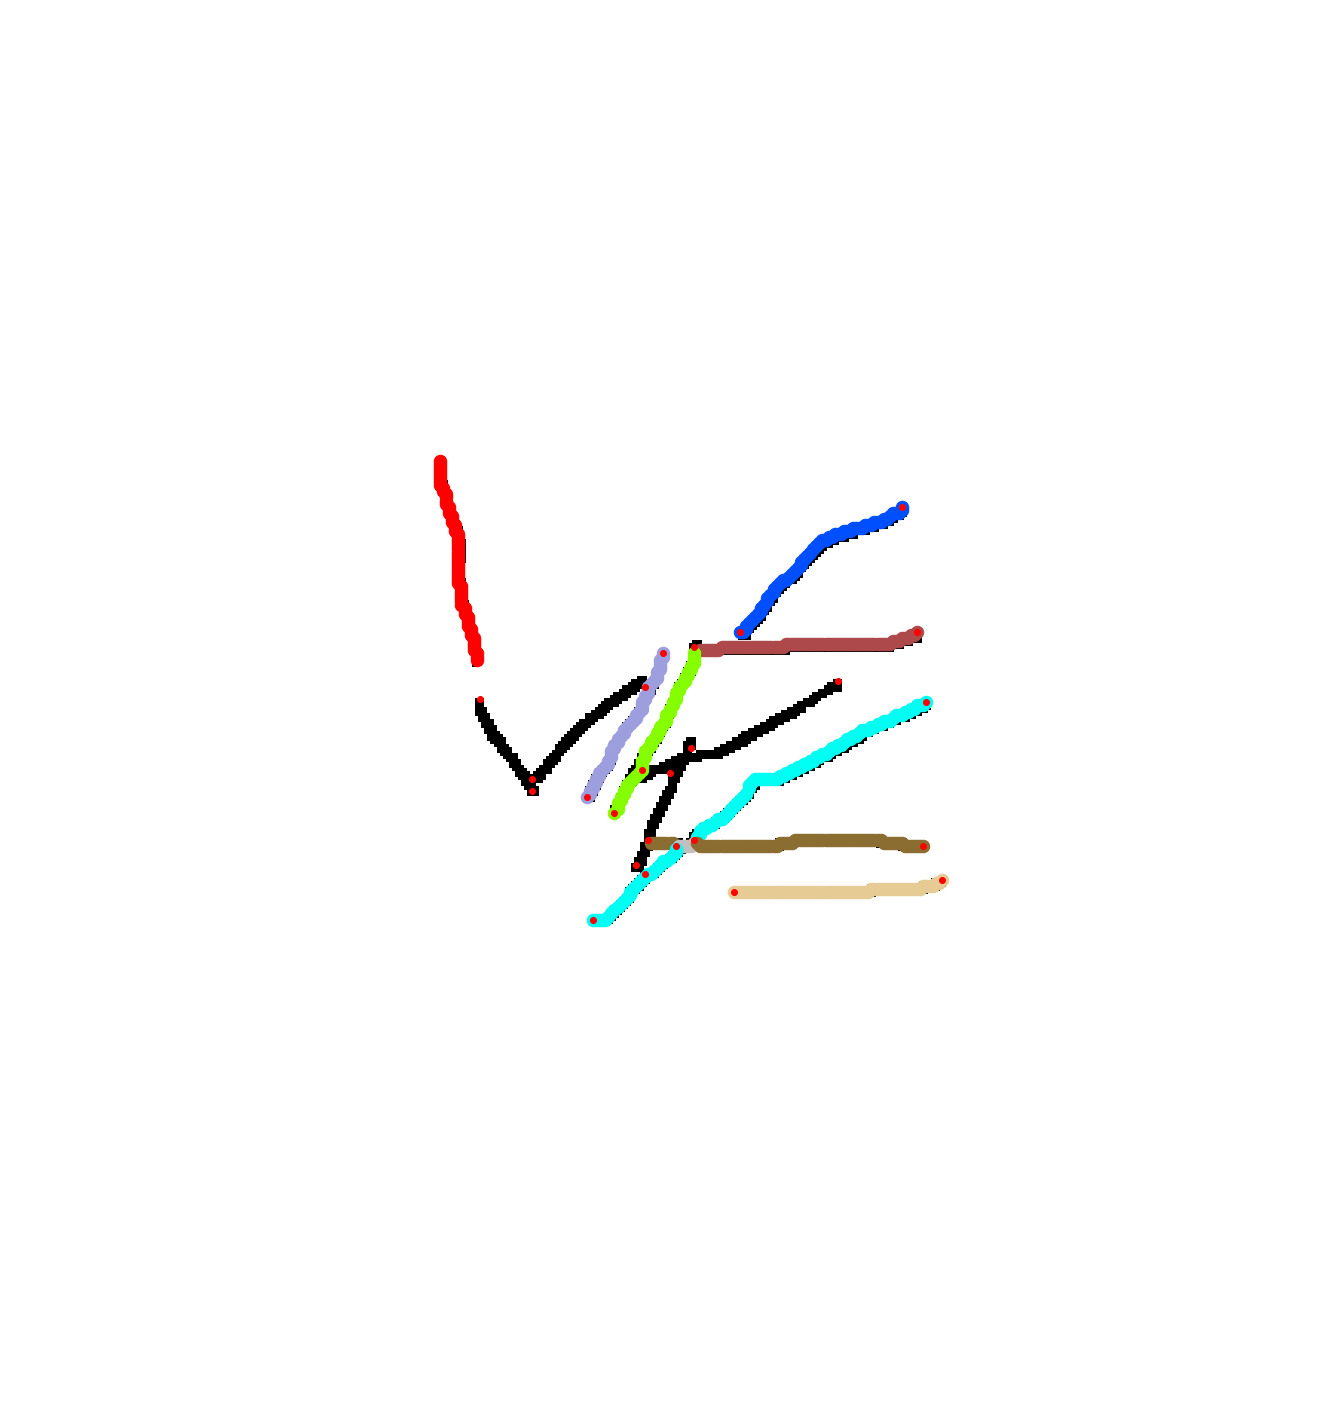

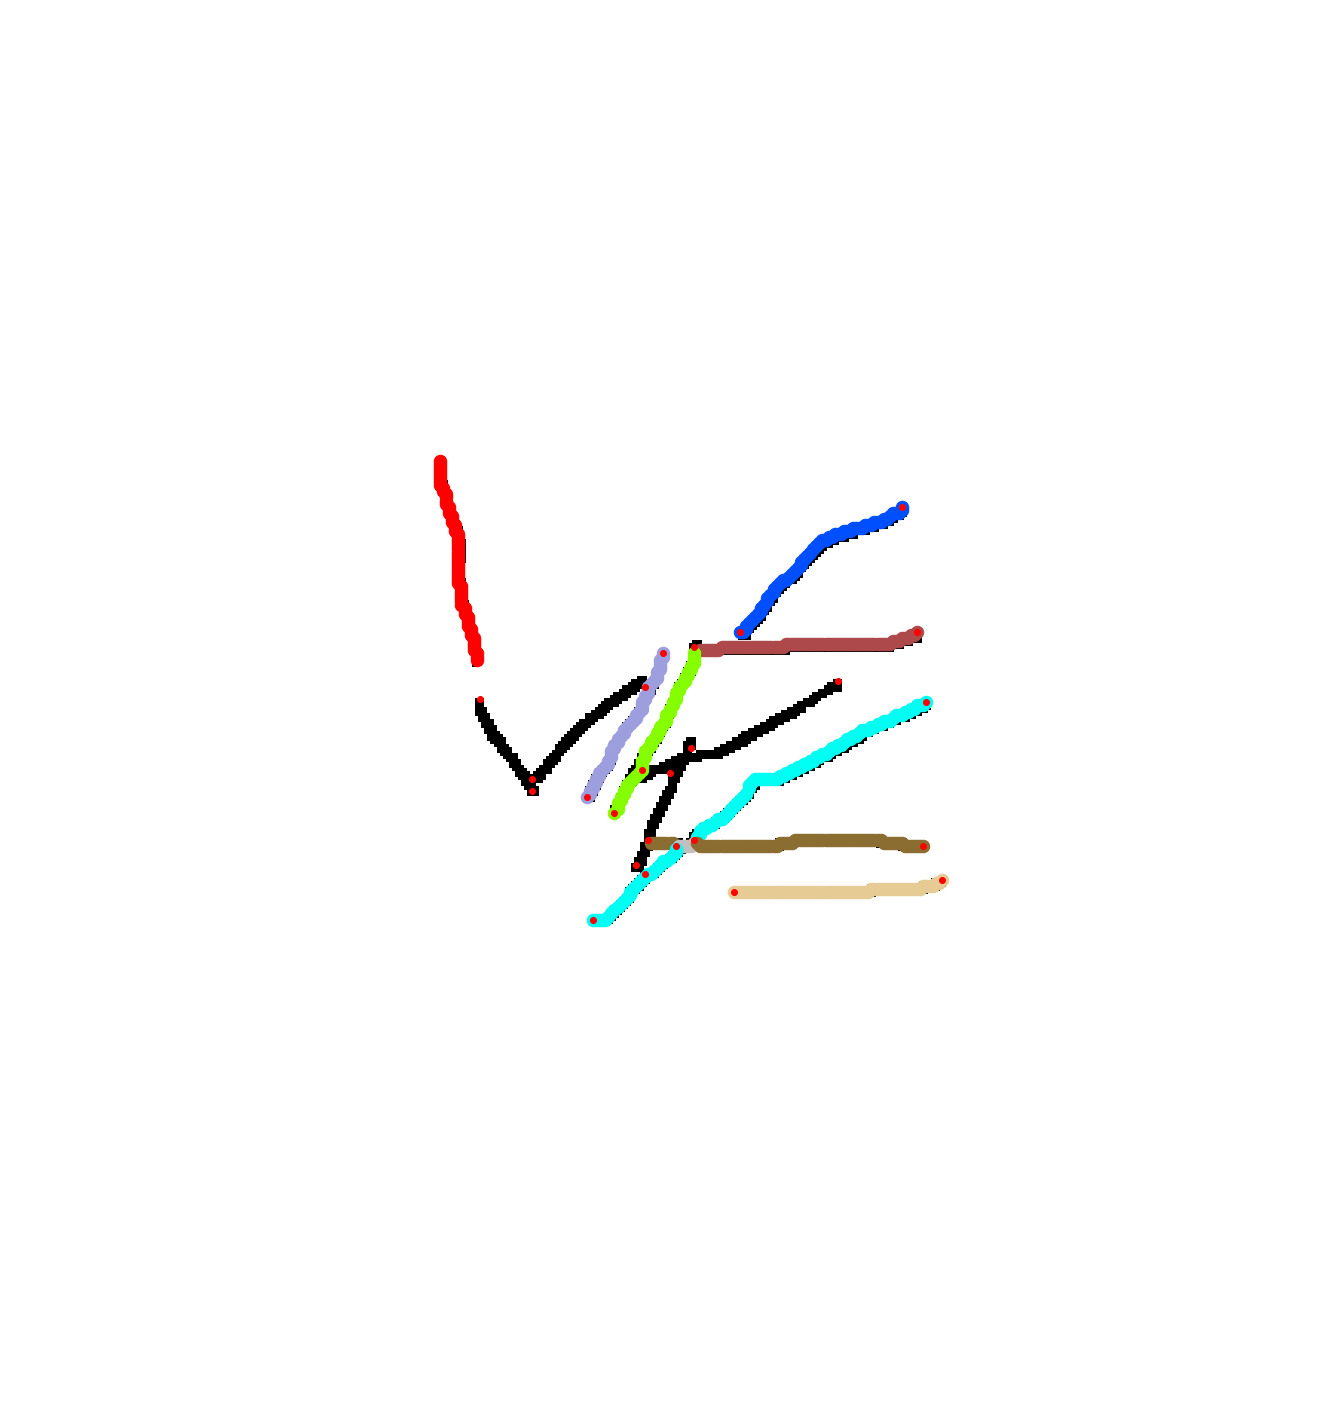

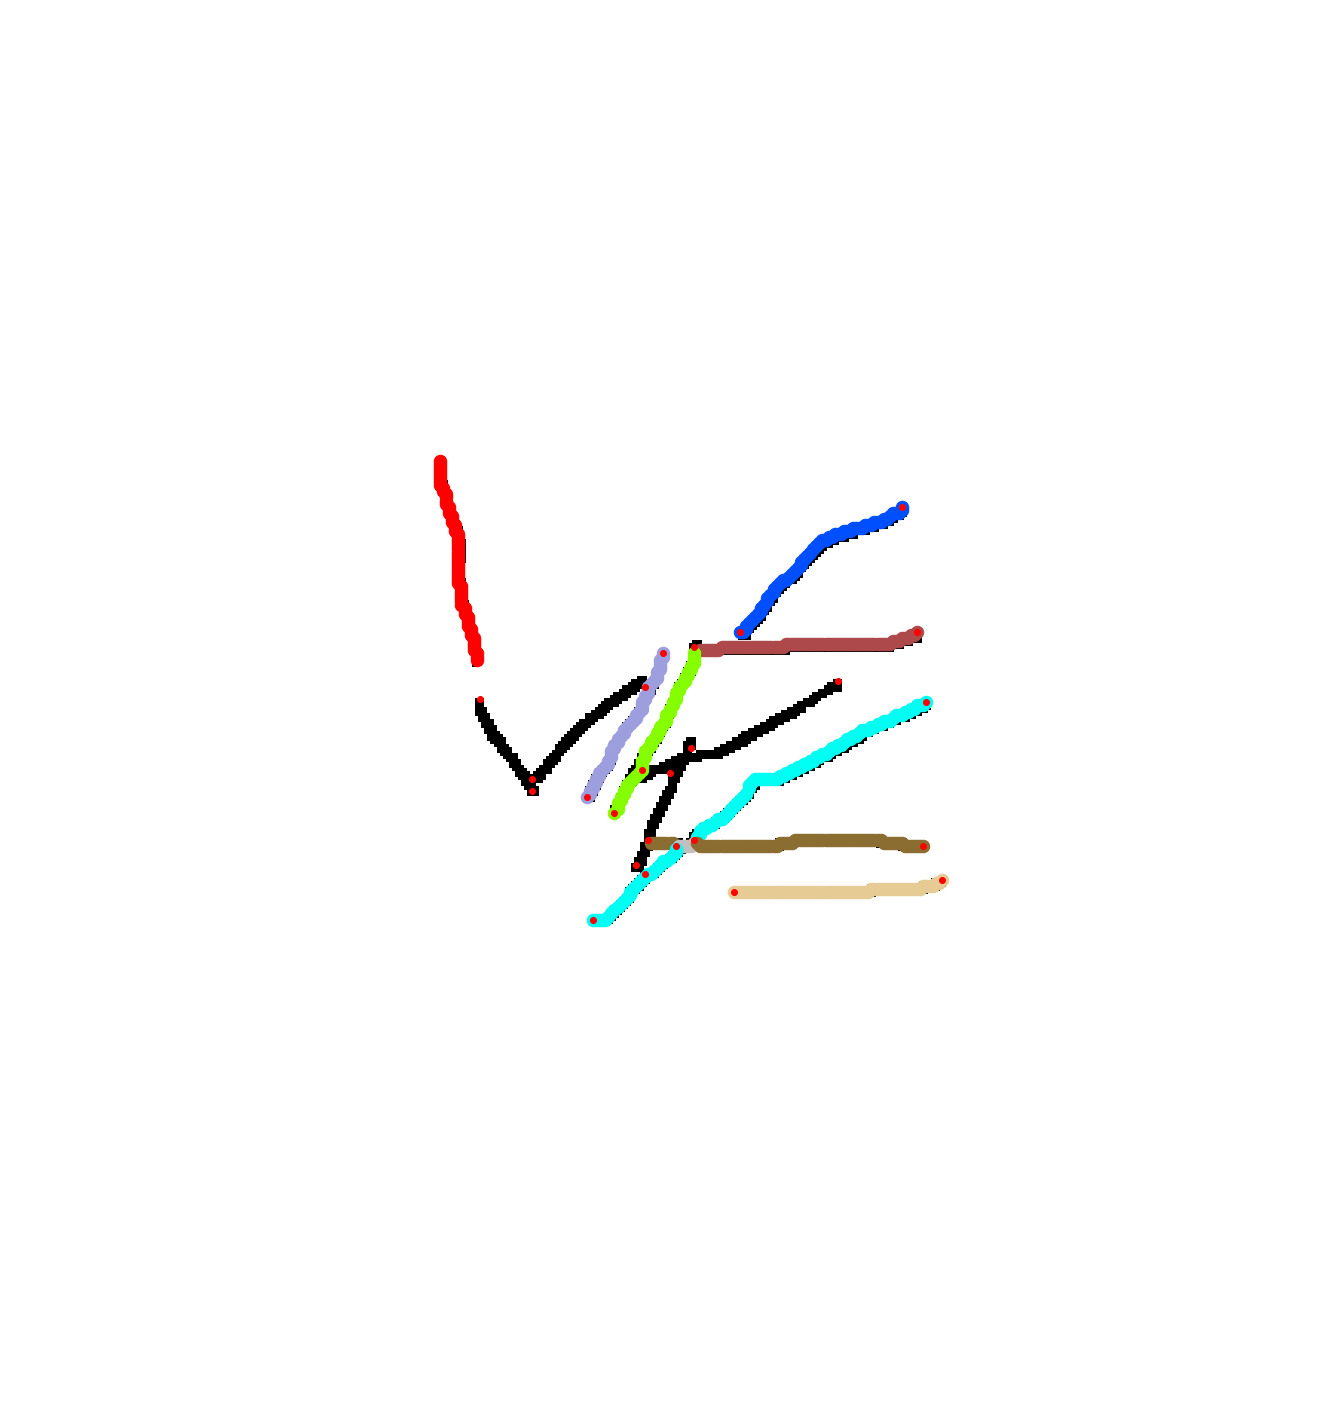

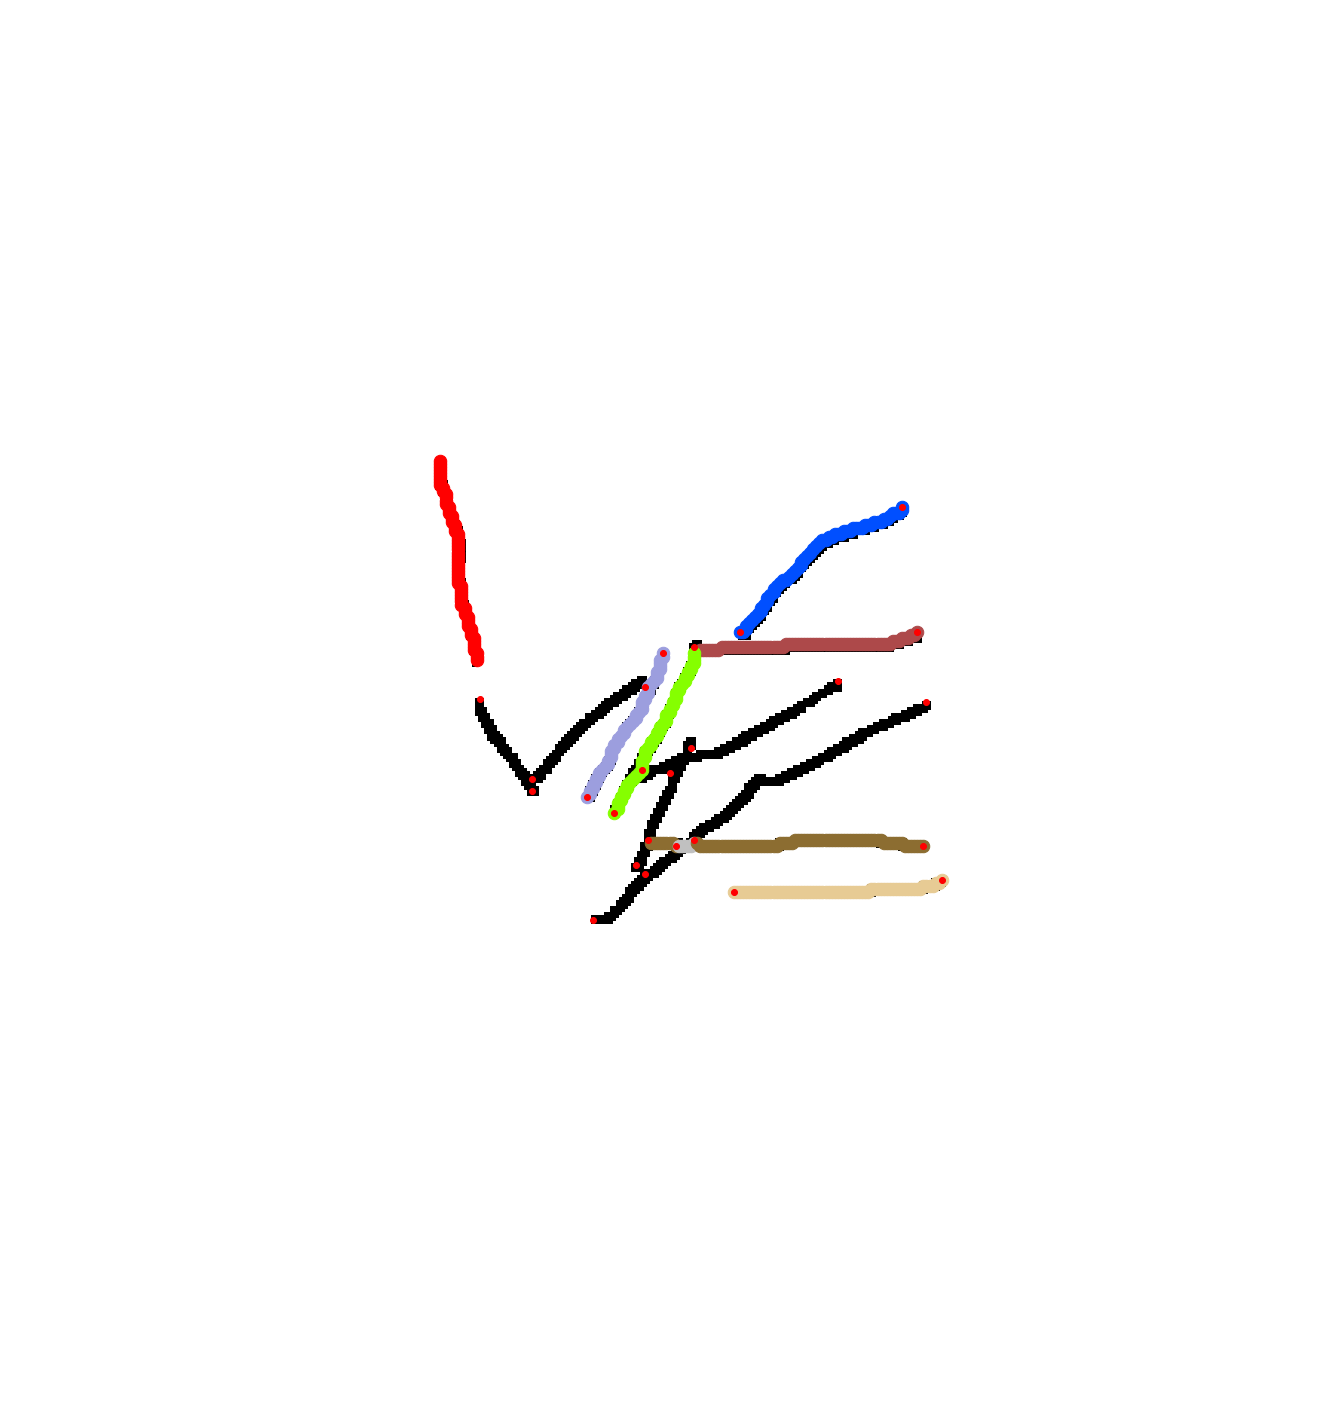

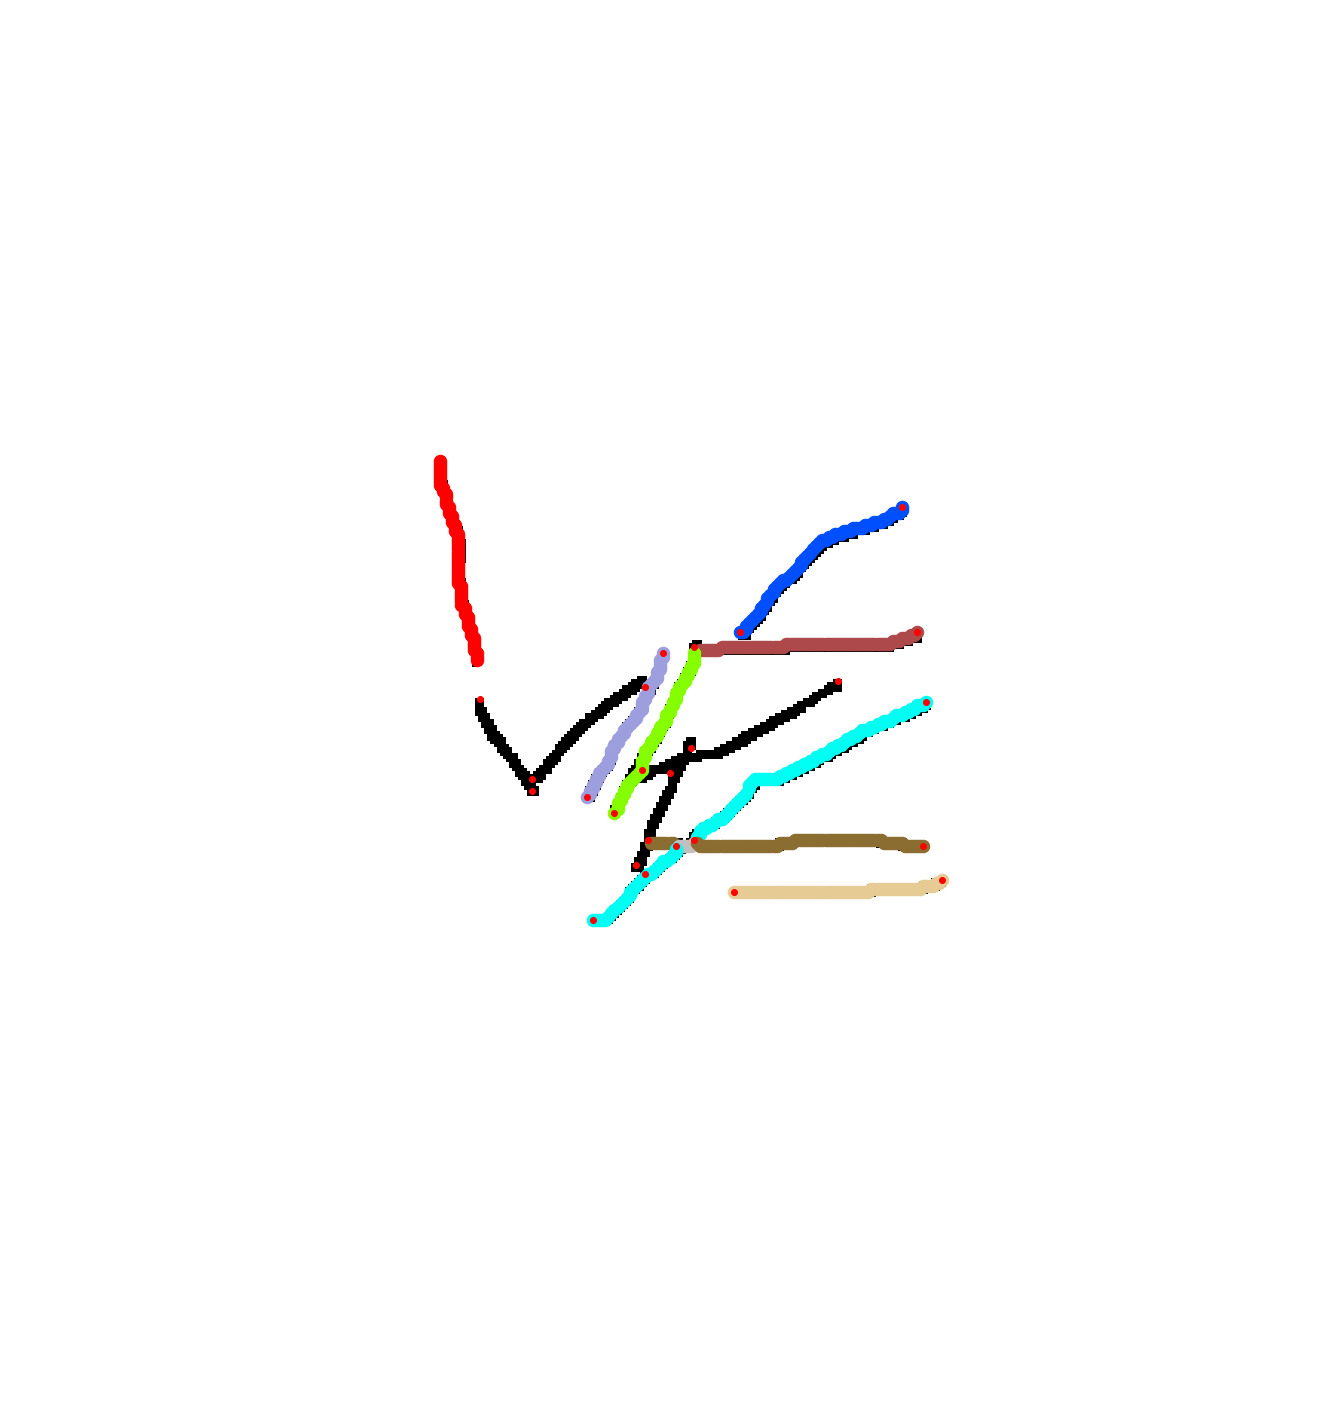

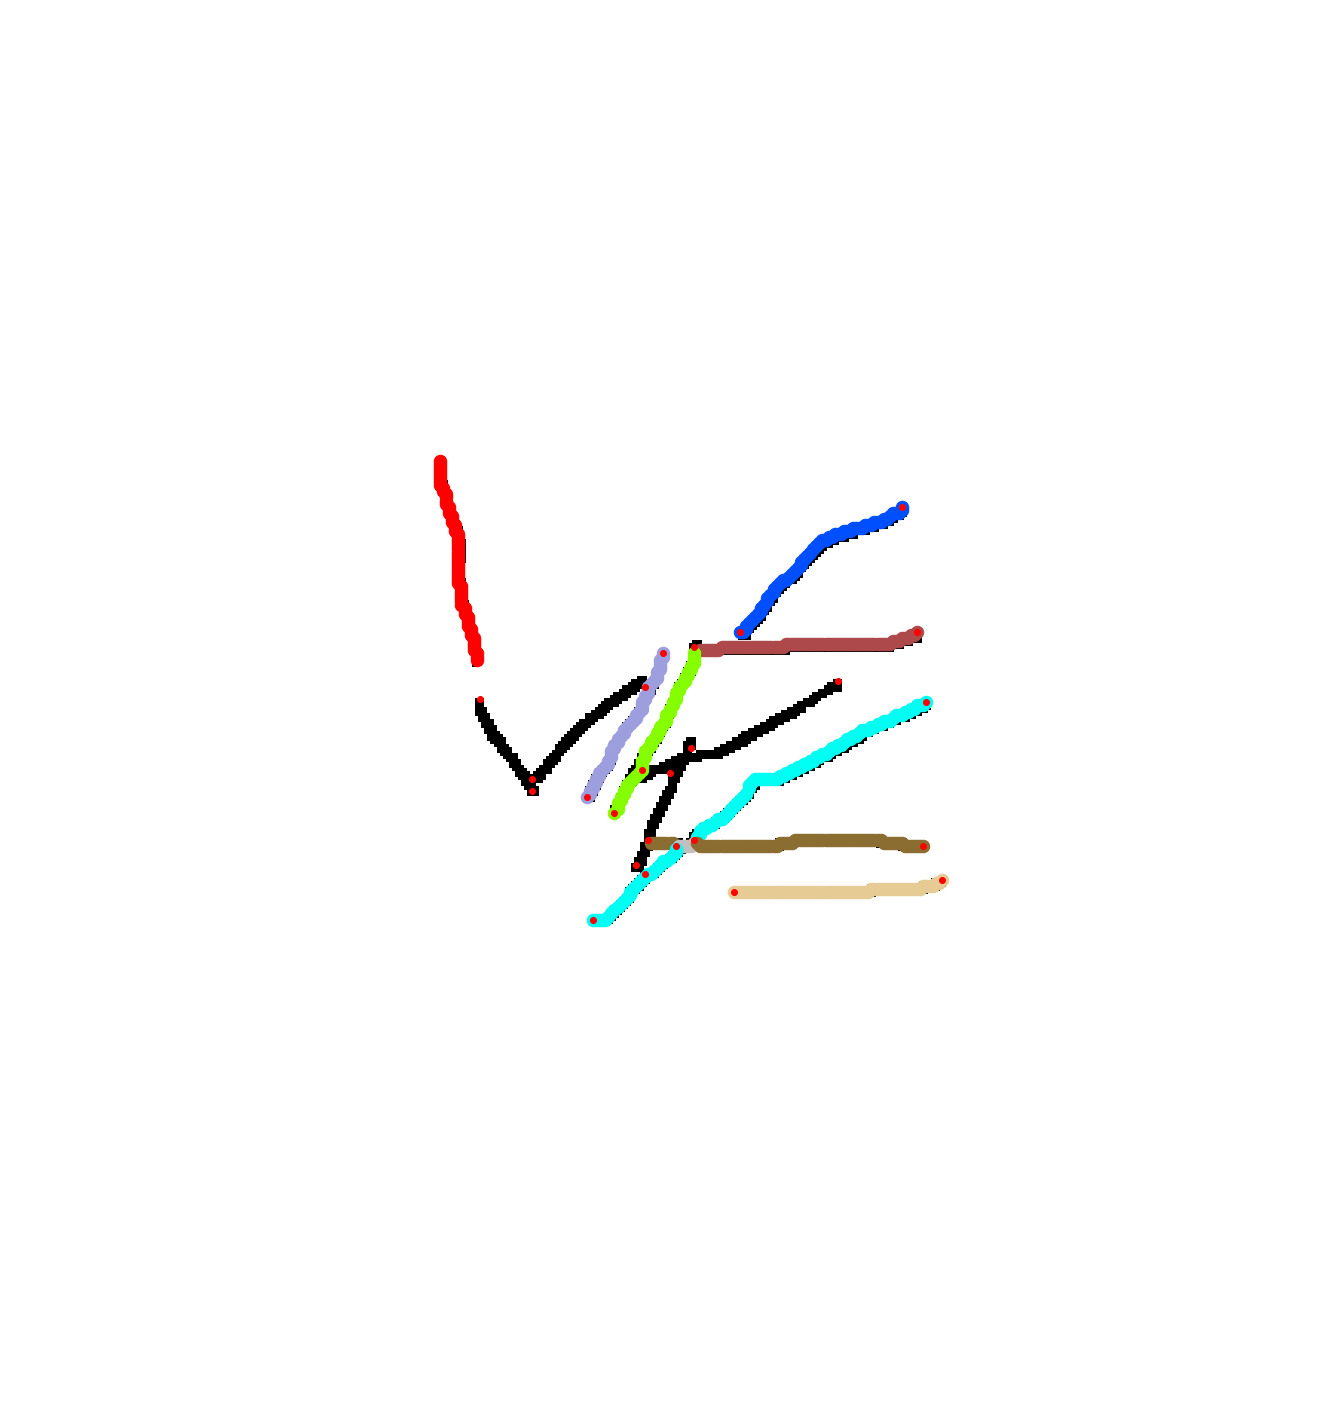

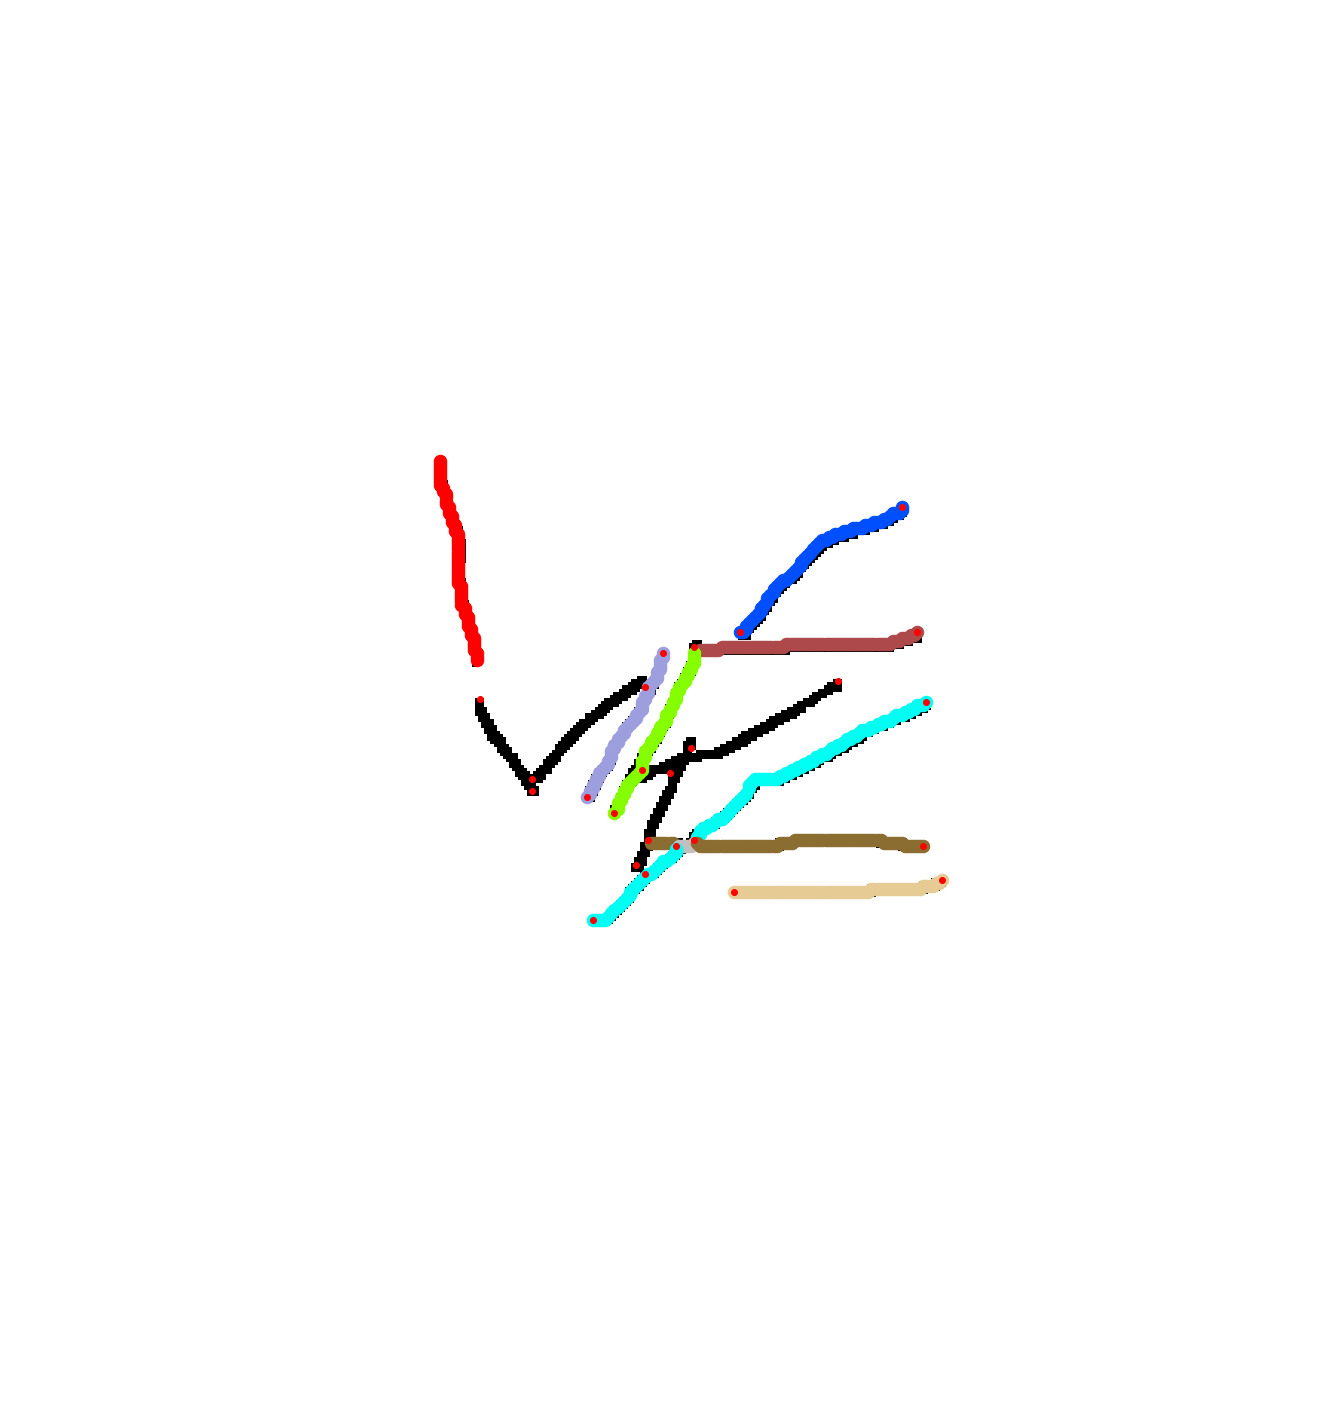

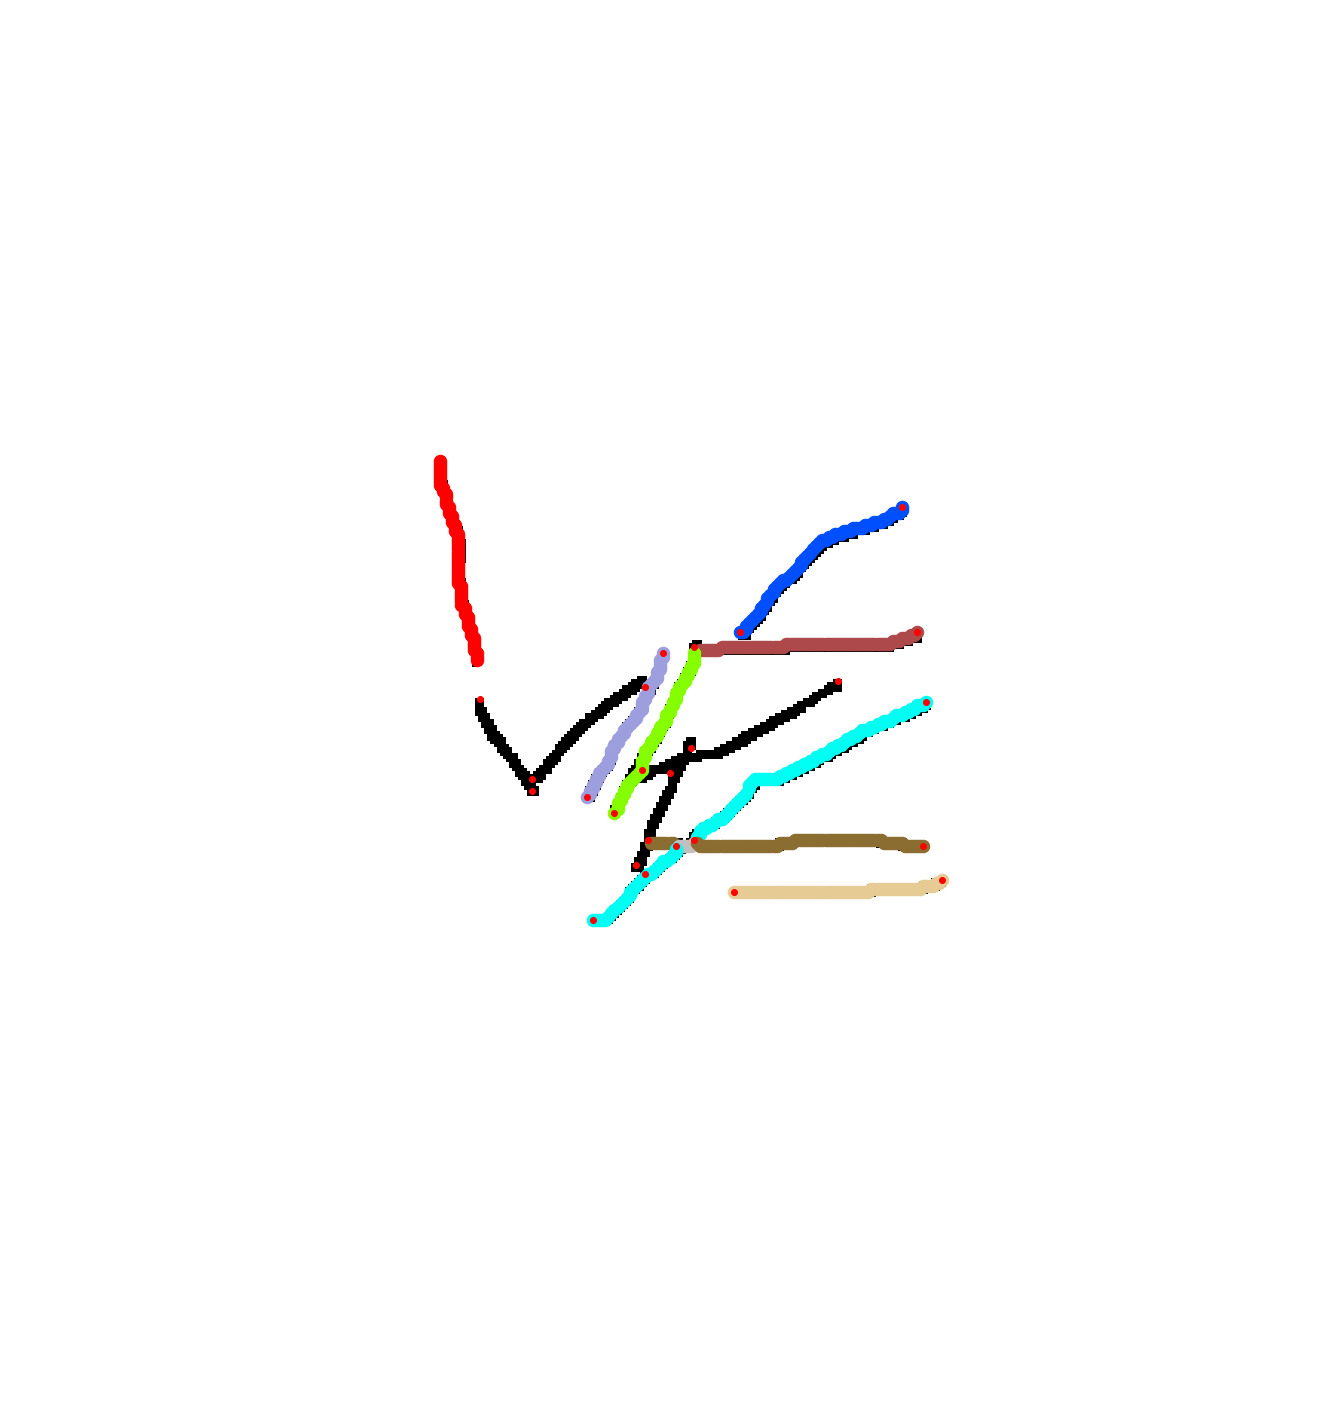

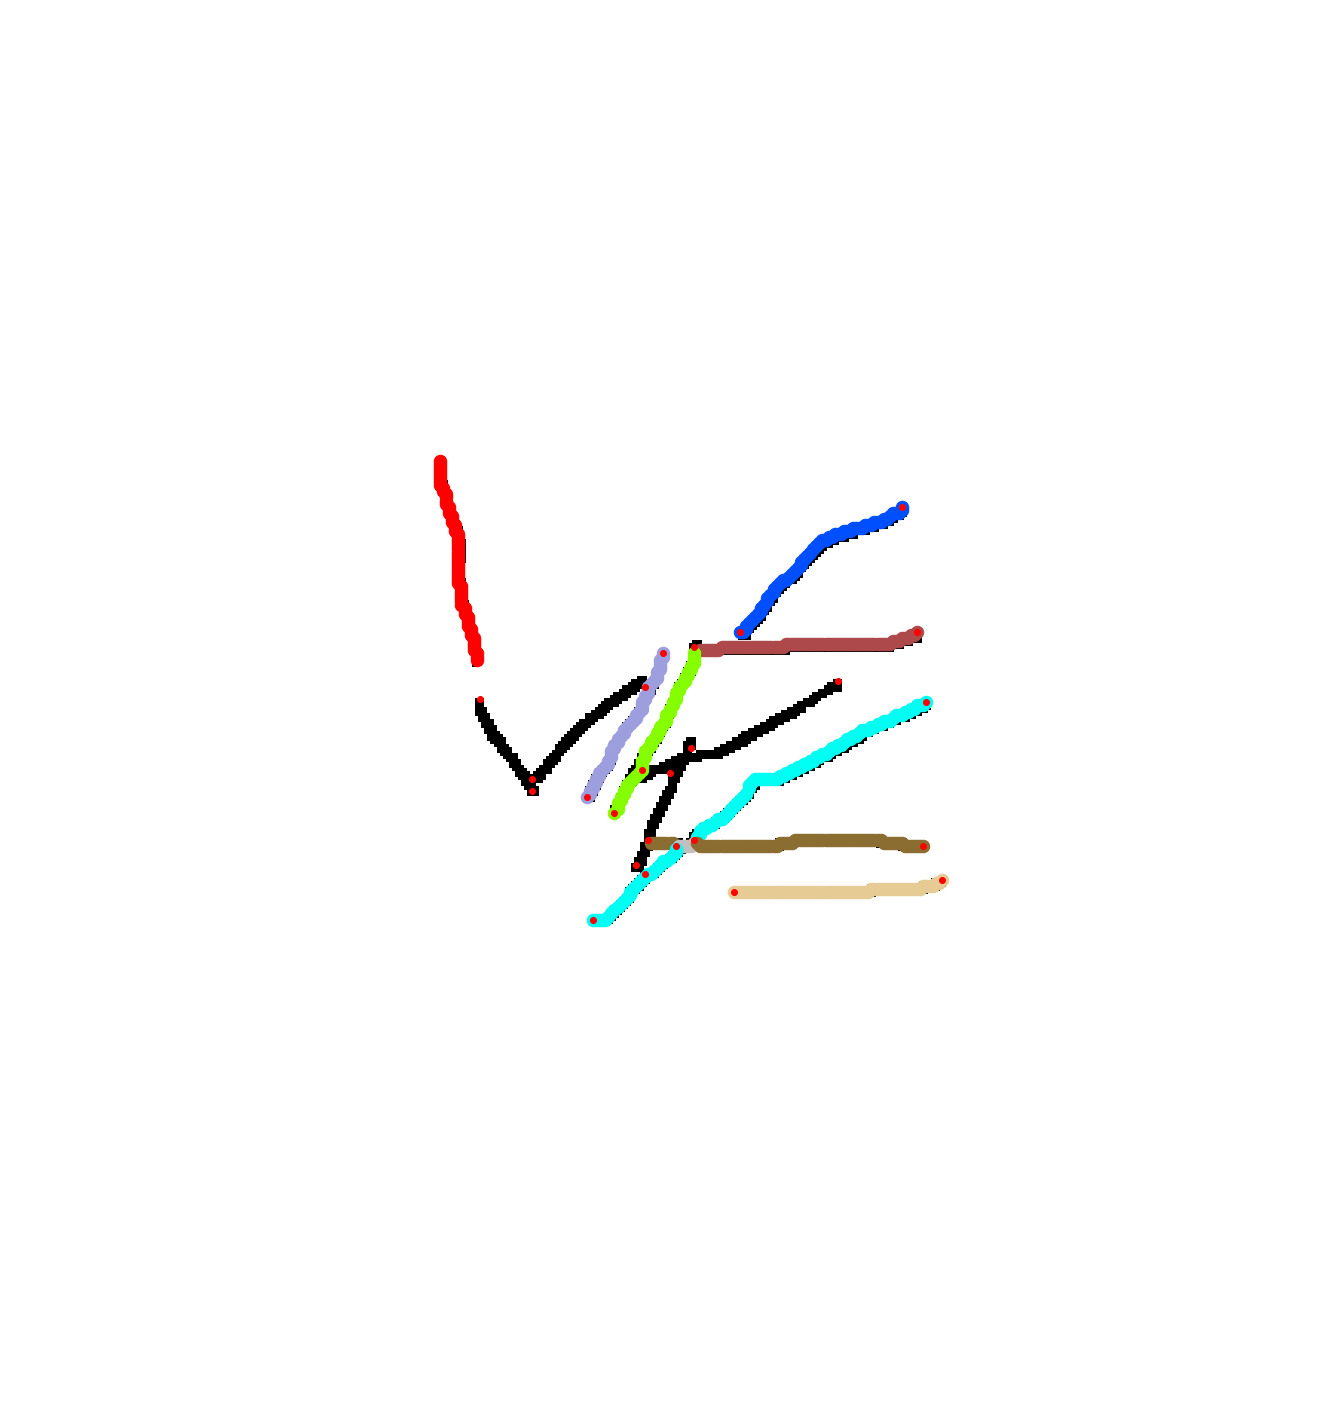

In [207]:
# Draw results for exact filament match
for counter, res in enumerate(exact_phils):
    # Information
    version=f"phil-s{seeds[counter]}-v05-exactMatch-"

    # Store colors used for the ground truth, to be used with the matched filaments/ants
    matched_ant_colors = {}
    
    # Extract one of the matched filaments/ants
    for val in res.values():
        # sort value, use to match the key in gtruth_rev, where its value is the key to the
        # ant color which it should use
        try:
            gtruth_clr_key = gtruth_rev[tuple(sorted(val))]
            matched_ant_colors[gtruth_clr_key] = ant_colors[gtruth_clr_key]
        except:
            pass
    
    print(f"Exact matches seed {seeds[counter]}: {len(res)} -> {matched_ant_colors.keys()}")
    # Uses edge2Ants from the ground truth drawing
    #print(edge2Ants)
    drawResults(graph, version, outSkel, nodes2edge, folder, name, edge2Ants,
                matched_ant_colors, save_fig=True, linesize=25, extended=False, mrkrsz=6)

## 2.4 Draw exactly matched ants/filaments proposed by DeFiNe with respecto to the ground truth

In [ ]:
'''
The key in gtruth_rev is a tuple of the sorted edges. If the sorted edges from the proposed filaments by DeFiNe, 
within the value of res.items() (dictionary) contain the same edges as a grount truth filament, it should appear
as a valid key contained in gtruth_rev
'''

# Reverse key/value of propFils within results list
exactListDefine = []
for counter, res in enumerate(resultsDefine):
    #print(f"Results Define {names_define[counter]}: {res}\n")
    exactMatch = {}
    for key,value in res.items():
        #print(tuple(sorted(value)))
        # The keys
        if tuple(sorted(value)) in gtruth_rev:
            exactMatch[key] = value
    exactListDefine.append(exactMatch)
    print(f"Exact matches {names_define[counter]}: {len(exactMatch)}")

#print(f"\nground truth {gtruth_dict}")
print(name)

'''
Create colormap for define's filament matches
Max number of matches is len(gtruth_dict)
'''

define_cmap = get_cmap("cool", len(gtruth_dict))
# Iterate over exact matches
for angleCntr, res in enumerate(exactListDefine):
    #print(defineAngles[angleCntr])
    #print(res)
    drawDefineRes(res, defineAngles[angleCntr], graph, define_cmap, save=True, folder=folder)

# 3. Aditional Results: Non Exact matches
## 3.1 Phil Metrics

In [216]:
# Metrics and measurements
print(name, datetime.now())
overMatches = []
for counter, res in enumerate(results):
    print(f"{seeds[counter]}, Edges: {graph.number_of_edges()}, Proposed Fils: {len(res)}")
    overMatches.append(metrics(g_truth, res, graph.number_of_edges()))

slice6-spinning-merged-gtruths-segmented 2021-05-19 12:41:28.790195
10, Edges: 59, Proposed Fils: 29
------Exact matches: 11 ->  1 8 9 11 12 14 15 16 17 20 22 
----over matches: 1 ->  21 
---- 2 edges over matches: 2 ->  5 7 
---- 3 edges over matches: 1 ->  18 
---- 4-6 edges over matches: 1 ->  4 
-----Variation of Information
Min: 0.0. Max (log(n)): 4.077537
----- 3.538856 97 201 5871 386 0.910450 0.141813 0.325503 0.200828 0.248399
0, Edges: 59, Proposed Fils: 32
------Exact matches: 11 ->  1 8 9 11 12 14 15 16 17 20 22 
----over matches: 2 ->  7 21 
---- 2 edges over matches: 2 ->  4 5 
---- 3 edges over matches: 1 ->  18 
---- 4-6 edges over matches: 2 ->  4 5 
-----Variation of Information
Min: 0.0. Max (log(n)): 4.077537
----- 4.867745 114 281 9007 751 0.898355 0.099476 0.288608 0.131792 0.180952
1271, Edges: 59, Proposed Fils: 30
------Exact matches: 11 ->  0 1 8 11 12 14 15 16 17 20 22 
----over matches: 2 ->  9 21 
---- 2 edges over matches: 2 ->  4 5 
---- 3 edges over matc

## 3.2 DeFiNe metrics 

In [98]:
for counter, res in enumerate(resultsDefine):
    print(f"DeFiNe {defineAngles[counter]}, Proposed Fils: {len(res)}")
    #print(f"GT {g_truth}")
    metrics(g_truth, res, graph.number_of_edges())

DeFiNe 60, Proposed Fils: 13
------Exact matches: 8 ->  0 1 3 4 8 9 10 11 
----over matches: 2 ->  2 6 
---- 2 edges over matches: 0 ->  
---- 3 edges over matches: 0 ->  
---- 4-6 edges over matches: 0 ->  
-----Variation of Information
Min: 0.0. Max (log(n)): 3.135494
----- 1.116802 22 23 479 37 0.893048 0.268293 0.488889 0.372881 0.423077
DeFiNe 30, Proposed Fils: 15
------Exact matches: 8 ->  0 1 3 4 8 9 10 11 
----over matches: 1 ->  2 
---- 2 edges over matches: 0 ->  
---- 3 edges over matches: 0 ->  
---- 4-6 edges over matches: 0 ->  
-----Variation of Information
Min: 0.0. Max (log(n)): 3.135494
----- 1.137823 16 15 429 36 0.897177 0.238806 0.516129 0.307692 0.385542


## 3.1 Overmatched results drawed

In [15]:
# Draw results for exact filament match
for counter, res in enumerate(exact_phils):
    # Information
    version=f"phil-s{seeds[counter]}-v05-exactMatch-"

    # Store colors used for the ground truth, to be used with the matched filaments/ants
    matched_ant_colors = {}
    
    # Extract one of the matched filaments/ants
    for val in res.values():
        # sort value, use to match the key in gtruth_rev, where its value is the key to the
        # ant color which it should use
        try:
            gtruth_clr_key = gtruth_rev[tuple(sorted(val))]
            matched_ant_colors[gtruth_clr_key] = ant_colors[gtruth_clr_key]
        except:
            pass
    
    print(f"Exact matches seed {seeds[counter]}: {len(res)} -> {matched_ant_colors.keys()}")
    # Uses edge2Ants from the ground truth drawing
    #print(edge2Ants)
    drawResults(graph, version, outSkel, nodes2edge, folder, name, edge2Ants,
                matched_ant_colors, save_fig=True, linesize=25, extended=False, mrkrsz=6)


extendedList = exact_phils.copy()
# Draw results for (exact + overmatches up to 3) filament match
for counter,res in enumerate(extendedList):
    version=f"-phil-s{seeds[counter]}-v05-overmatches-1-"
    # extend res
    for overmatch in overMatches[counter]:
        res[overmatch] = results[counter][overmatch]
    print(seeds[counter], res)
    # Get colors for overmatched filaments
    edge2Ants, extendClrDict = edge2draw(res)
    # Add new colors from extendClrDict to clrGroupExtended[counter]
    for overmatch in overMatches[counter]:
        clrGroupExtended[counter][overmatch] = extendClrDict[overmatch]
    # Only keys in res should have colors
    for key, val in clrGroupExtended[counter].items():
        if key not in res.keys():
            clrGroupDict[counter][key] = (0, 0, 0, 0)
    
    drawResults(graph, res, version, outSkel, nodes2edge, folder, name, 
                edge2Ants, proposed_ant_colors[counter], save=False, linesize=25, extended=False, mrkrsz=6)

10 {0: [13, 16, 19, 31], 1: [34], 3: [35, 37], 5: [0, 6], 7: [38], 9: [3, 12, 22, 24, 32], 11: [17, 18, 29], 12: [30], 13: [33], 14: [13, 15, 20, 27, 28], 16: [14, 25], 17: [4], 15: [10, 19, 31], 8: [2, 7, 9, 18, 29], 6: [35, 36]}


NameError: name 'clrGroupDict' is not defined